<a href="https://colab.research.google.com/github/aren4/Kambo/blob/main/Kambo_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Set pandas to display all columns
pd.set_option('display.max_columns', None)

df = pd.read_csv('/content/drive/MyDrive/AllSurveysCleanedML.csv')
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('.', '_')
df.head()

Days_between_sessions_SUM  Lyme_SUM_CATQ  Autoimmune_DDX_SUM_CATQ  \
0                         28              0                        1   
1                         29              0                        1   
2                         14              1                        1   
3                         21              1                        1   
4                         17              0                        1   

   Psych_Meds_SUM_CATQ  Number_of_points_1  Number_of_points_2  \
0                    0                   3                   3   
1                    0                   5                   7   
2                    1                   5                   7   
3                    0                   2                   3   
4                    0                   3                   4   

   Number_of_points_3  Total_Points_SUM_SUB  Private_or_group_1  \
0                   3                     6                   1   
1                   8                    15                   3   
2                   8                    15                   3   
3                   3                     6                   1   
4                   6                    10                   1   

   Private_or_group_2  Private_or_group_3  vomit_1  vomit_2  vomit_3  \
0                   1                   1        1        1        1   
1                   3                   1        1        1        1   
2                   3                   1        1        1        1   
3                   1                   1        1        1        1   
4                   1                   1        1        0        1   

   Total_Vomit  BM_1  BM_2  BM_3  Total_BM  Fainting_1  Fainting_2  \
0            3     0     0     0         0           0           0   
1            3     1     1     0         2           0           0   
2            3     1     1     0         2           0           0   
3            3     1     1     0         2           0           0   
4            2     0     0     0         0           0           0   

   Fainting_3  Total_Fainting  Rapeh_1  Rapeh_2  Rapeh_3  Total_Rapeh  \
0           0               0        1        1        1            3   
1           0               0        1        1        1            3   
2           0               0        0        0        0            0   
3           0               0        1        1        1            3   
4           0               0        1        1        1            3   

   Sananga_1  Sananga_2  Sananga_3  Total_Sananga  Head_Neck_Points  \
0          1          1          1              3                 1   
1          1          1          1              3                 1   
2          0          0          0              0                 1   
3          1          1          1              3                 1   
4          1          1          1              3                 0   

   Body_Points  Arm_Points  Leg_Points  What_is_your_age?  \
0            1           1           0                 28   
1            1           1           0                 45   
2            1           1           0                 38   
3            1           1           0                 23   
4            1           1           0                 48   

   What_biological_sex_were_you_assigned_at_birth?  Sex_SUM_CATQ  \
0                                                0             0   
1                                                0             0   
2                                                0             0   
3                                                0             0   
4                                                0             0   

   Ethnicity_SUM_CATQ  Education_SUM_CATQ  Income_SUM_CATQ    BMI_SUM  \
0                   5                   2                2  21.079670   
1                   0                   0                3  32.770916   
2                   0                   1              

(   Outcome_Delta_MAAS  Outcome_Delta_MFI  Outcome_Delta_IDSSR  Responder_MAAS  \
 0            0.933333                  4                   -6               1   
 1            0.066667                 -4                    5               0   
 2            1.133333                 42                  -16               1   
 3            0.333333                 -4                   -6               0   
 4            1.000000                 26                   -6               1   
 
    Responder_MFI  Responder_Global_PWB  
 0              0                     1  
 1              1                     1  
 2              0                     1  
 3              1                     1  
 4              0                     1  ,
 {'MAAS Responder': np.int64(19),
  'MFI Improved': np.int64(14),
  'Global PWB Responder': np.int64(29)})

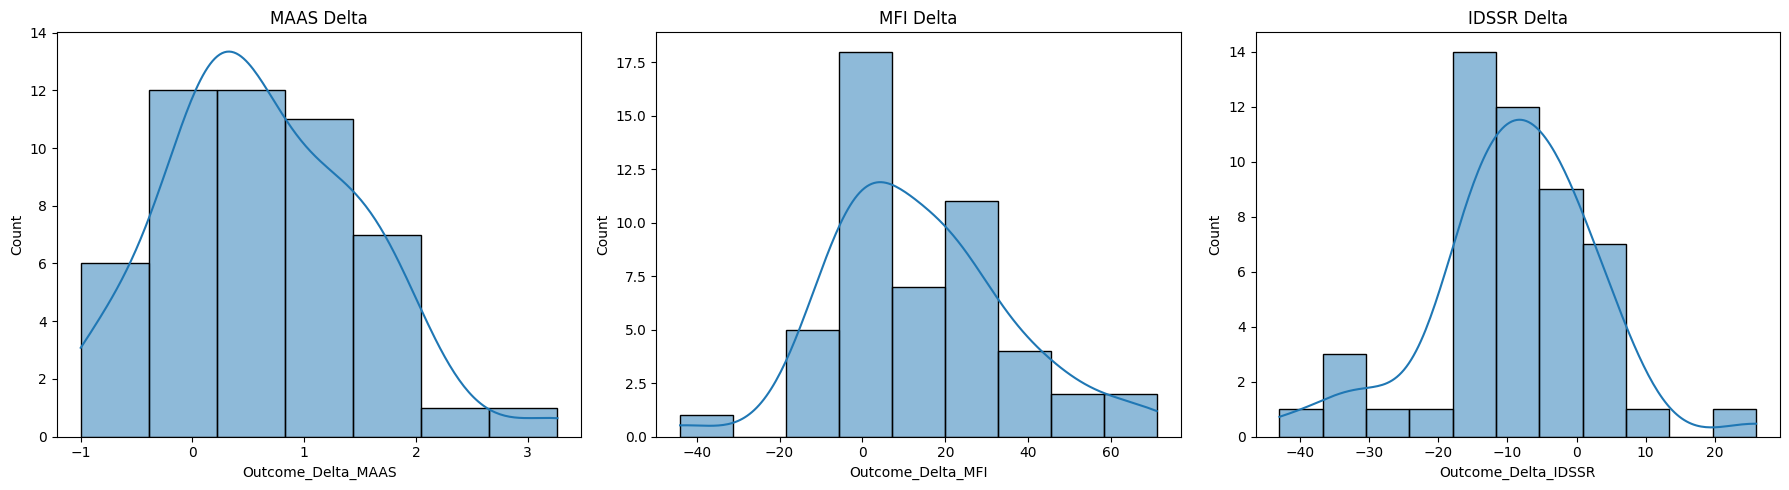

In [ ]:
# Step 1: Define outcome variables

# Continuous outcomes
df['Outcome_Delta_MAAS'] = df['DELTA_MAAS_SUM_Delta_1_to_3']
df['Outcome_Delta_MFI'] = df['DELTA_MFI_Delta_SUM_1_to_SUM_3']
df['Outcome_Delta_IDSSR'] = df['IDSSR_3'] - df['IDSSR_1']

# Binary outcomes
# Define a "responder" if delta MAAS ≥ 1 SD
maas_threshold = df['Outcome_Delta_MAAS'].std()
df['Responder_MAAS'] = (df['Outcome_Delta_MAAS'] >= maas_threshold).astype(int)

# Define "fatigue improvement" if MFI decreased
df['Responder_MFI'] = (df['Outcome_Delta_MFI'] < 0).astype(int)

# Define global PWB improvement: majority of 6 subscales improved from 1 to 3
pwb_deltas = [
    'PWB_SUM_Delta_1_to_3_Autonomy',
    'PWB_SUM_Delta_1_to_3_Environmental_Mastery',
    'PWB_SUM_Delta_1_to_3_Personal_Growth',
    'PWB_SUM_Delta_1_to_3_Positive_Relations',
    'PWB_SUM_Delta_1_to_3_Purpose_in_Life',
    'PWB_SUM_Delta_1_to_3_Self-Acceptance'
]
df['Responder_Global_PWB'] = (df[pwb_deltas].gt(0).sum(axis=1) >= 4).astype(int)

# Return a summary of how many positive cases are in each outcome
outcome_summary = {
    'MAAS Responder': df['Responder_MAAS'].sum(),
    'MFI Improved': df['Responder_MFI'].sum(),
    'Global PWB Responder': df['Responder_Global_PWB'].sum()
}

df_outcomes = df[['Outcome_Delta_MAAS', 'Outcome_Delta_MFI', 'Outcome_Delta_IDSSR',
                  'Responder_MAAS', 'Responder_MFI', 'Responder_Global_PWB']]

import seaborn as sns
import matplotlib.pyplot as plt

# Quick visualization of outcome distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['Outcome_Delta_MAAS'], ax=axes[0], kde=True).set(title='MAAS Delta')
sns.histplot(df['Outcome_Delta_MFI'], ax=axes[1], kde=True).set(title='MFI Delta')
sns.histplot(df['Outcome_Delta_IDSSR'], ax=axes[2], kde=True).set(title='IDSSR Delta')
plt.tight_layout()

df_outcomes.head(), outcome_summary


In [ ]:
import numpy as np

# Drop MEQ, CEQ, and 5DASC predictors for now to prevent leakage
exclude_keywords = ['MEQ30', 'CEQ30', 'FiveDASC']
predictor_columns = [col for col in df.columns
                     if not any(keyword in col for keyword in exclude_keywords)
                     and col not in df_outcomes.columns
                     and not col.startswith('IDSSR')
                     and col not in ['Outcome_Delta_MAAS', 'Outcome_Delta_MFI', 'Outcome_Delta_IDSSR',
                                     'Responder_MAAS', 'Responder_MFI', 'Responder_Global_PWB']]

# Handle private/group session aggregation
group_session_types = {
    0: 'Private',
    1: 'Partner',
    2: 'Small_Group',
    3: 'Large_Group'
}

# Create counts for each session type
for code, label in group_session_types.items():
    df[f'{label}_Sessions'] = (
        (df['Private_or_group_1'] == code).astype(int) +
        (df['Private_or_group_2'] == code).astype(int) +
        (df['Private_or_group_3'] == code).astype(int)
    )

# Aggregate group session columns to feature set
group_features = [f'{label}_Sessions' for label in group_session_types.values()]
predictor_columns.extend(group_features)

# Location of points columns (already binary indicators)
location_features = ['Head_Neck_Points', 'Body_Points', 'Arm_Points', 'Leg_Points']
predictor_columns.extend(location_features)

# Drop vestigial location columns
vestigial_cols = ['Location of Points 1', 'Location of Points 2', 'Location of Points 3']
df = df.drop(columns=[col for col in vestigial_cols if col in df.columns])

# Final predictor matrix
X = df[predictor_columns].copy()

# Fill any missing values with column means (for modeling)
X = X.apply(lambda col: col.fillna(col.mean()) if col.dtype in [np.float64, np.int64] else col)

# Confirm shape and show a preview
X.shape, X.head()


((50, 121),
    Days_between_sessions_SUM  Lyme_SUM_CATQ  Autoimmune_DDX_SUM_CATQ  \
 0                         28              0                        1   
 1                         29              0                        1   
 2                         14              1                        1   
 3                         21              1                        1   
 4                         17              0                        1   
 
    Psych_Meds_SUM_CATQ  Number_of_points_1  Number_of_points_2  \
 0                    0                   3                   3   
 1                    0                   5                   7   
 2                    1                   5                   7   
 3                    0                   2                   3   
 4                    0                   3                   4   
 
    Number_of_points_3  Total_Points_SUM_SUB  Private_or_group_1  \
 0                   3                     6                   1   
 1      

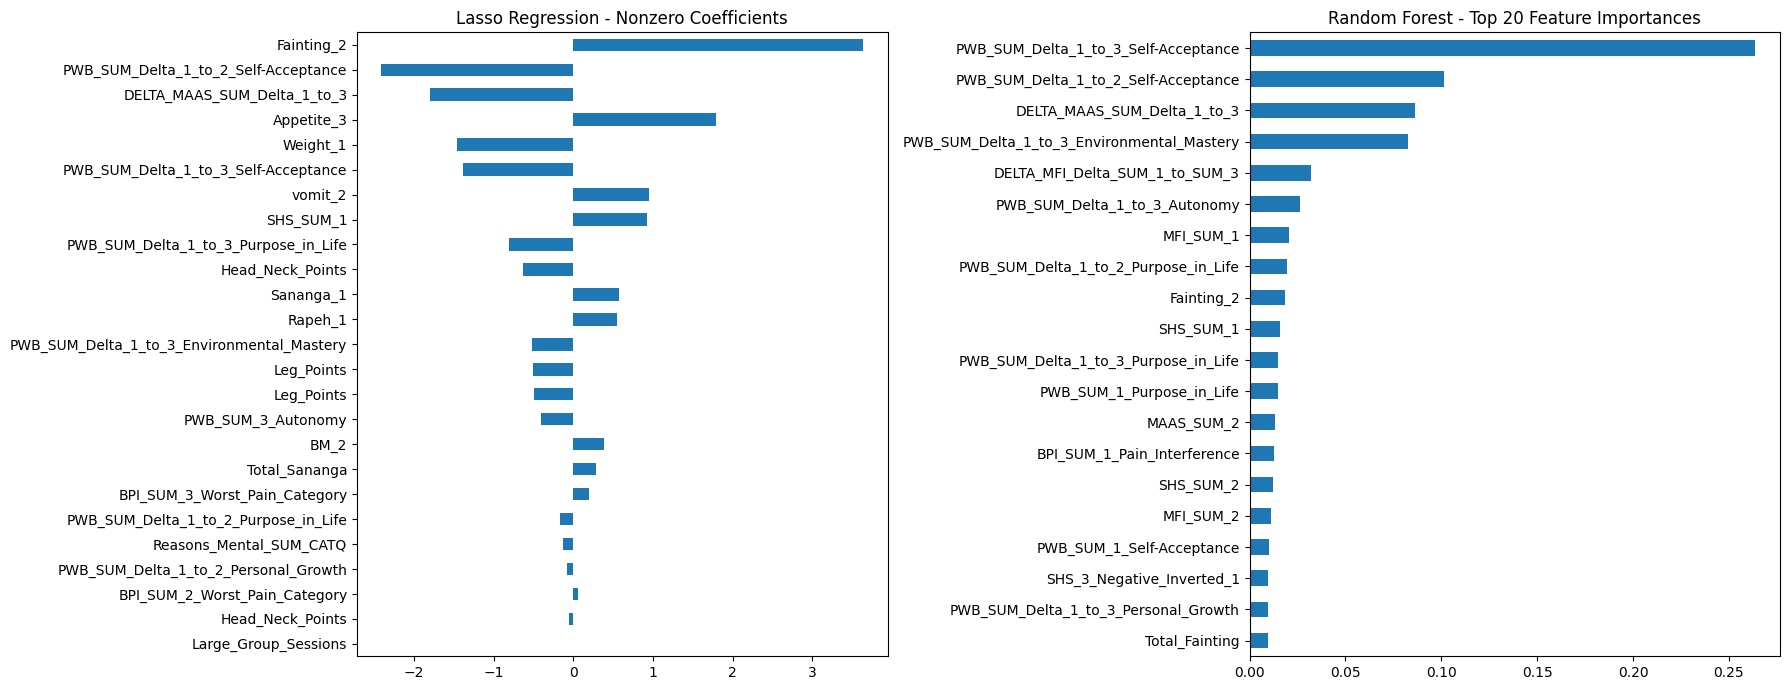

(Fainting_2                              3.644394
 PWB_SUM_Delta_1_to_2_Self-Acceptance   -2.413976
 DELTA_MAAS_SUM_Delta_1_to_3            -1.798911
 Appetite_3                              1.796418
 Weight_1                               -1.456755
 PWB_SUM_Delta_1_to_3_Self-Acceptance   -1.381927
 vomit_2                                 0.952182
 SHS_SUM_1                               0.926320
 PWB_SUM_Delta_1_to_3_Purpose_in_Life   -0.804531
 Head_Neck_Points                       -0.629271
 dtype: float64,
 PWB_SUM_Delta_1_to_3_Self-Acceptance          0.263484
 PWB_SUM_Delta_1_to_2_Self-Acceptance          0.101330
 DELTA_MAAS_SUM_Delta_1_to_3                   0.086105
 PWB_SUM_Delta_1_to_3_Environmental_Mastery    0.082408
 DELTA_MFI_Delta_SUM_1_to_SUM_3                0.032277
 PWB_SUM_Delta_1_to_3_Autonomy                 0.026546
 MFI_SUM_1                                     0.020768
 PWB_SUM_Delta_1_to_2_Purpose_in_Life          0.019347
 Fainting_2                        

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Define outcome variable
y = df['Outcome_Delta_IDSSR']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------
# Lasso Regression with Cross-Validation
# ---------------------------
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_scaled, y)

# Extract non-zero coefficients
lasso_coef = pd.Series(lasso.coef_, index=X.columns)
lasso_nonzero = lasso_coef[lasso_coef != 0].sort_values(key=abs, ascending=False)

# ---------------------------
# Random Forest Regression
# ---------------------------
rf = RandomForestRegressor(n_estimators=500, random_state=42)
rf.fit(X, y)

# Get feature importances
rf_importances = pd.Series(rf.feature_importances_, index=X.columns)
rf_top = rf_importances.sort_values(ascending=False).head(20)

# ---------------------------
# Visualize
# ---------------------------
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Lasso
lasso_nonzero.plot(kind='barh', ax=axes[0])
axes[0].set_title('Lasso Regression - Nonzero Coefficients')
axes[0].invert_yaxis()

# Random Forest
rf_top.plot(kind='barh', ax=axes[1])
axes[1].set_title('Random Forest - Top 20 Feature Importances')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

# Show top predictors from both
lasso_nonzero.head(10), rf_top.head(10)


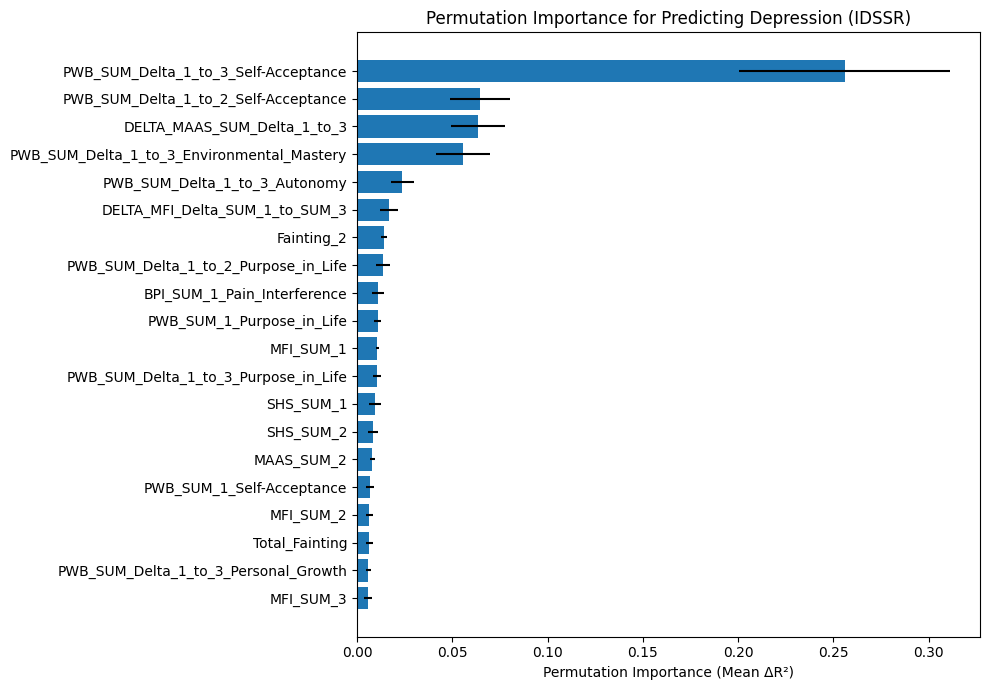

Feature  Importance       Std
0         PWB_SUM_Delta_1_to_3_Self-Acceptance    0.255975  0.055379
1         PWB_SUM_Delta_1_to_2_Self-Acceptance    0.064640  0.015822
2                  DELTA_MAAS_SUM_Delta_1_to_3    0.063511  0.014239
3   PWB_SUM_Delta_1_to_3_Environmental_Mastery    0.055560  0.014268
4                PWB_SUM_Delta_1_to_3_Autonomy    0.023746  0.005928
5               DELTA_MFI_Delta_SUM_1_to_SUM_3    0.016861  0.004701
6                                   Fainting_2    0.014298  0.001592
7         PWB_SUM_Delta_1_to_2_Purpose_in_Life    0.013441  0.003655
8                  BPI_SUM_1_Pain_Interference    0.011015  0.002946
9                    PWB_SUM_1_Purpose_in_Life    0.010875  0.001888
10                                   MFI_SUM_1    0.010623  0.000905
11        PWB_SUM_Delta_1_to_3_Purpose_in_Life    0.010321  0.002179
12                                   SHS_SUM_1    0.009443  0.003050
13                                   SHS_SUM_2    0.008344  0.002523
14                                  MAAS_SUM_2    0.008080  0.001332
15                   PWB_SUM_1_Self-Acceptance    0.006573  0.002061
16                                   MFI_SUM_2    0.006480  0.001729
17                              Total_Fainting    0.006463  0.001662
18        PWB_SUM_Delta_1_to_3_Personal_Growth    0.005849  0.001336
19                                   MFI_SUM_3    0.005735  0.002264

In [ ]:
from sklearn.inspection import permutation_importance

# Use the already-fitted Random Forest model for IDSSR
perm_result = permutation_importance(
    rf, X, y,
    n_repeats=30,
    random_state=42,
    scoring='r2'
)

# Create a sorted DataFrame of results
perm_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_result.importances_mean,
    'Std': perm_result.importances_std
}).sort_values(by='Importance', ascending=False)

# Plot top 20 permutation importances
top_perm = perm_df.head(20)
plt.figure(figsize=(10, 7))
plt.barh(top_perm['Feature'], top_perm['Importance'], xerr=top_perm['Std'])
plt.xlabel('Permutation Importance (Mean ΔR²)')
plt.title('Permutation Importance for Predicting Depression (IDSSR)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

top_perm.reset_index(drop=True)


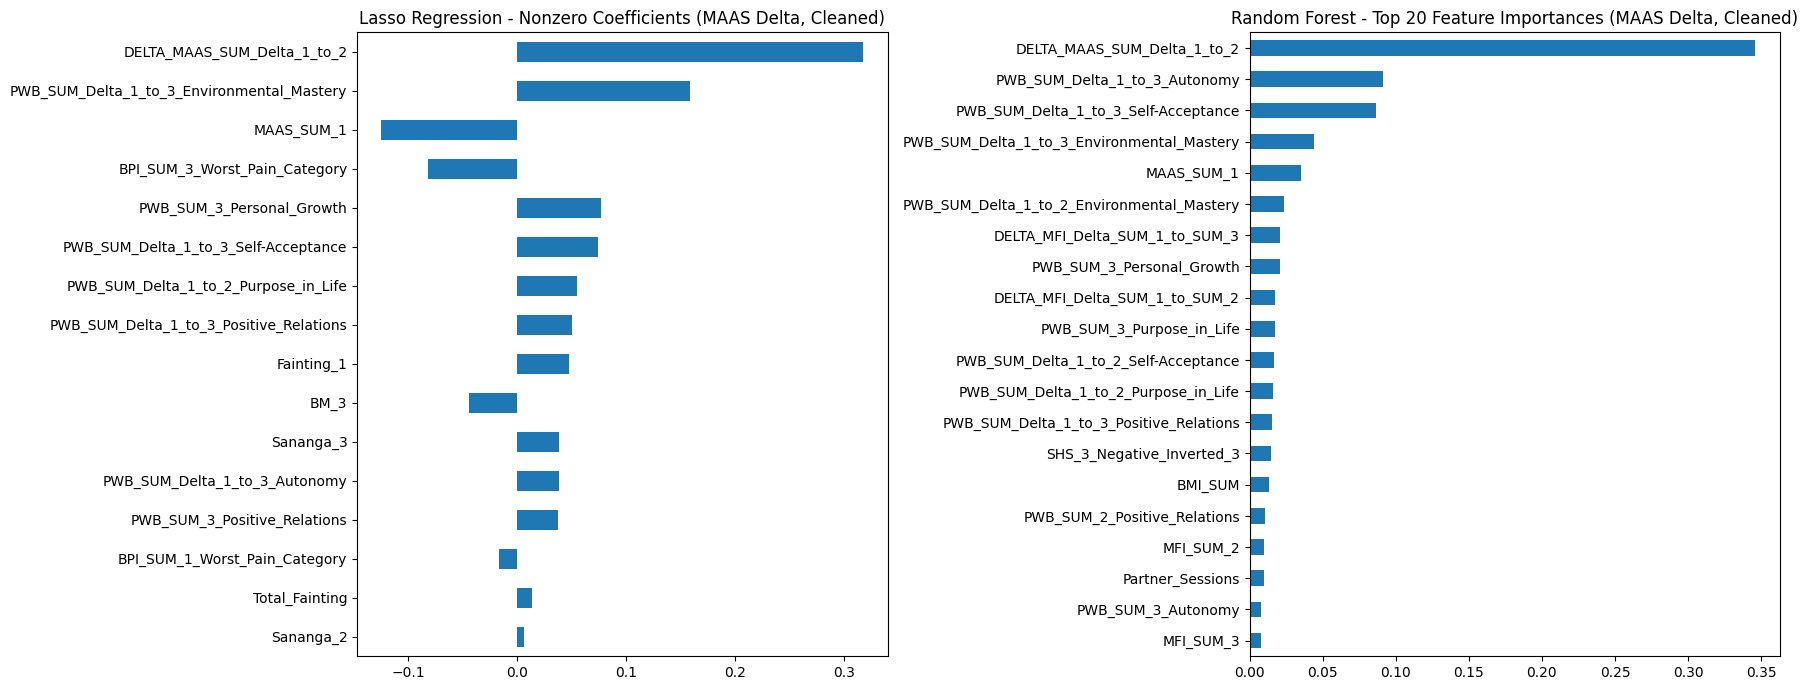

(DELTA_MAAS_SUM_Delta_1_to_2                   0.317343
 PWB_SUM_Delta_1_to_3_Environmental_Mastery    0.157951
 MAAS_SUM_1                                   -0.124985
 BPI_SUM_3_Worst_Pain_Category                -0.082382
 PWB_SUM_3_Personal_Growth                     0.076658
 PWB_SUM_Delta_1_to_3_Self-Acceptance          0.073542
 PWB_SUM_Delta_1_to_2_Purpose_in_Life          0.054759
 PWB_SUM_Delta_1_to_3_Positive_Relations       0.050466
 Fainting_1                                    0.047302
 BM_3                                         -0.044835
 dtype: float64,
 DELTA_MAAS_SUM_Delta_1_to_2                   0.345618
 PWB_SUM_Delta_1_to_3_Autonomy                 0.091054
 PWB_SUM_Delta_1_to_3_Self-Acceptance          0.086820
 PWB_SUM_Delta_1_to_3_Environmental_Mastery    0.044152
 MAAS_SUM_1                                    0.035351
 PWB_SUM_Delta_1_to_2_Environmental_Mastery    0.023401
 DELTA_MFI_Delta_SUM_1_to_SUM_3                0.020740
 PWB_SUM_3_Personal_Growth     

In [ ]:
# Remove leakage columns
leakage_vars = ['DELTA_MAAS_SUM_Delta_1_to_3', 'MAAS_SUM_3']
X_maas = X.drop(columns=[col for col in leakage_vars if col in X.columns])

# Scale the new feature matrix
X_maas_scaled = scaler.fit_transform(X_maas)

y_maas = df['Outcome_Delta_MAAS']

# ---------------------------
# Refit Lasso
# ---------------------------
lasso_maas_fixed = LassoCV(cv=5, random_state=42)
lasso_maas_fixed.fit(X_maas_scaled, y_maas)

lasso_coef_maas_fixed = pd.Series(lasso_maas_fixed.coef_, index=X_maas.columns)
lasso_nonzero_maas_fixed = lasso_coef_maas_fixed[lasso_coef_maas_fixed != 0].sort_values(key=abs, ascending=False)

# ---------------------------
# Refit Random Forest
# ---------------------------
rf_maas_fixed = RandomForestRegressor(n_estimators=500, random_state=42)
rf_maas_fixed.fit(X_maas, y_maas)

rf_importance_maas_fixed = pd.Series(rf_maas_fixed.feature_importances_, index=X_maas.columns)
rf_top_maas_fixed = rf_importance_maas_fixed.sort_values(ascending=False).head(20)

# ---------------------------
# Visualize
# ---------------------------
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Lasso
lasso_nonzero_maas_fixed.plot(kind='barh', ax=axes[0])
axes[0].set_title('Lasso Regression - Nonzero Coefficients (MAAS Delta, Cleaned)')
axes[0].invert_yaxis()

# RF
rf_top_maas_fixed.plot(kind='barh', ax=axes[1])
axes[1].set_title('Random Forest - Top 20 Feature Importances (MAAS Delta, Cleaned)')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

lasso_nonzero_maas_fixed.head(10), rf_top_maas_fixed.head(10)


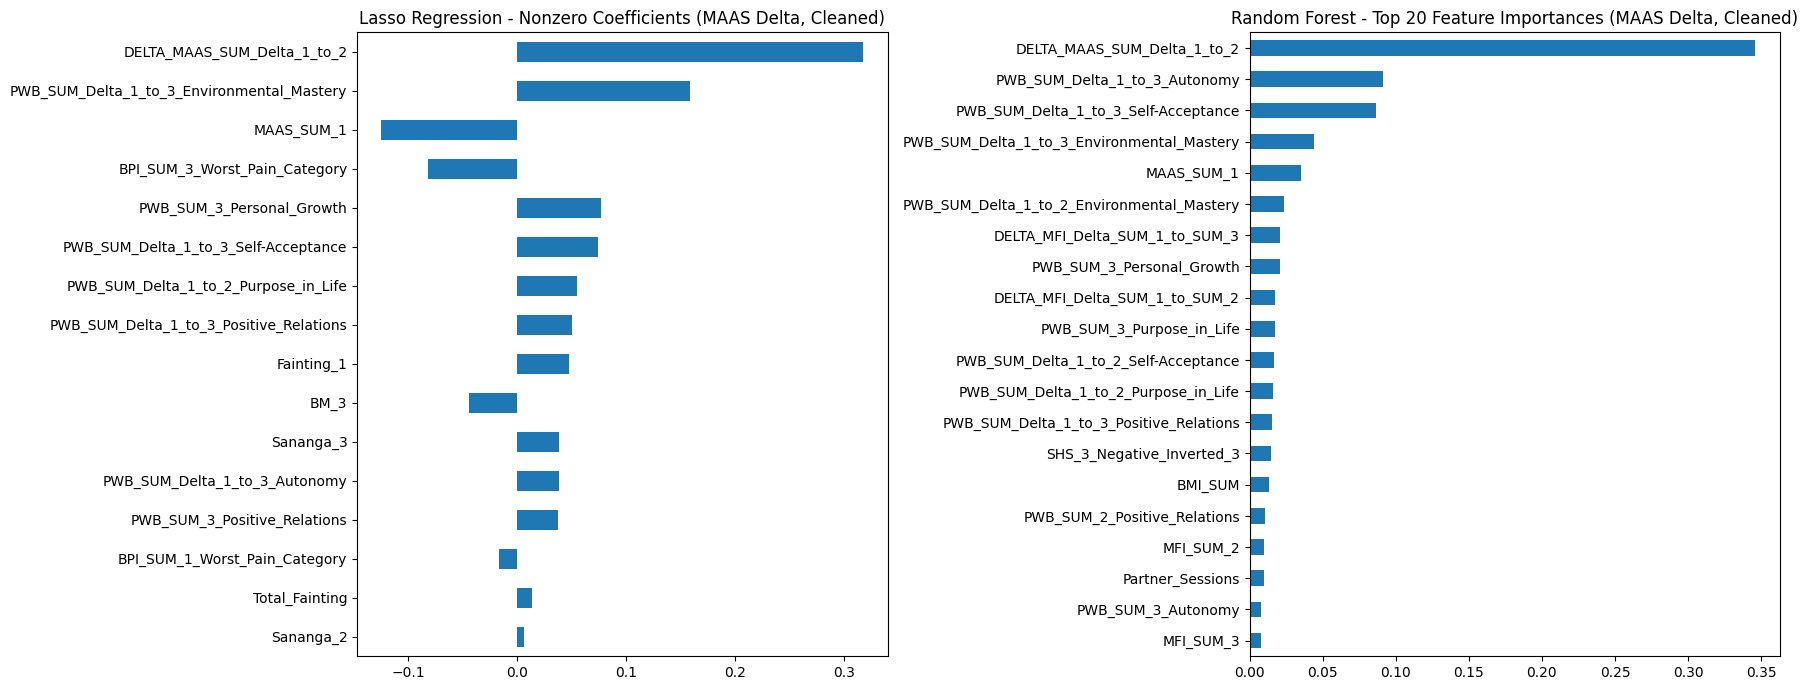

(DELTA_MAAS_SUM_Delta_1_to_2                   0.317343
 PWB_SUM_Delta_1_to_3_Environmental_Mastery    0.157951
 MAAS_SUM_1                                   -0.124985
 BPI_SUM_3_Worst_Pain_Category                -0.082382
 PWB_SUM_3_Personal_Growth                     0.076658
 PWB_SUM_Delta_1_to_3_Self-Acceptance          0.073542
 PWB_SUM_Delta_1_to_2_Purpose_in_Life          0.054759
 PWB_SUM_Delta_1_to_3_Positive_Relations       0.050466
 Fainting_1                                    0.047302
 BM_3                                         -0.044835
 dtype: float64,
 DELTA_MAAS_SUM_Delta_1_to_2                   0.345618
 PWB_SUM_Delta_1_to_3_Autonomy                 0.091054
 PWB_SUM_Delta_1_to_3_Self-Acceptance          0.086820
 PWB_SUM_Delta_1_to_3_Environmental_Mastery    0.044152
 MAAS_SUM_1                                    0.035351
 PWB_SUM_Delta_1_to_2_Environmental_Mastery    0.023401
 DELTA_MFI_Delta_SUM_1_to_SUM_3                0.020740
 PWB_SUM_3_Personal_Growth     

In [ ]:
# Remove leakage columns
leakage_vars = ['DELTA_MAAS_SUM_Delta_1_to_3', 'MAAS_SUM_3']
X_maas = X.drop(columns=[col for col in leakage_vars if col in X.columns])

# Scale the new feature matrix
X_maas_scaled = scaler.fit_transform(X_maas)

# ---------------------------
# Refit Lasso
# ---------------------------
lasso_maas_fixed = LassoCV(cv=5, random_state=42)
lasso_maas_fixed.fit(X_maas_scaled, y_maas)

lasso_coef_maas_fixed = pd.Series(lasso_maas_fixed.coef_, index=X_maas.columns)
lasso_nonzero_maas_fixed = lasso_coef_maas_fixed[lasso_coef_maas_fixed != 0].sort_values(key=abs, ascending=False)

# ---------------------------
# Refit Random Forest
# ---------------------------
rf_maas_fixed = RandomForestRegressor(n_estimators=500, random_state=42)
rf_maas_fixed.fit(X_maas, y_maas)

rf_importance_maas_fixed = pd.Series(rf_maas_fixed.feature_importances_, index=X_maas.columns)
rf_top_maas_fixed = rf_importance_maas_fixed.sort_values(ascending=False).head(20)

# ---------------------------
# Visualize
# ---------------------------
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Lasso
lasso_nonzero_maas_fixed.plot(kind='barh', ax=axes[0])
axes[0].set_title('Lasso Regression - Nonzero Coefficients (MAAS Delta, Cleaned)')
axes[0].invert_yaxis()

# RF
rf_top_maas_fixed.plot(kind='barh', ax=axes[1])
axes[1].set_title('Random Forest - Top 20 Feature Importances (MAAS Delta, Cleaned)')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

lasso_nonzero_maas_fixed.head(10), rf_top_maas_fixed.head(10)


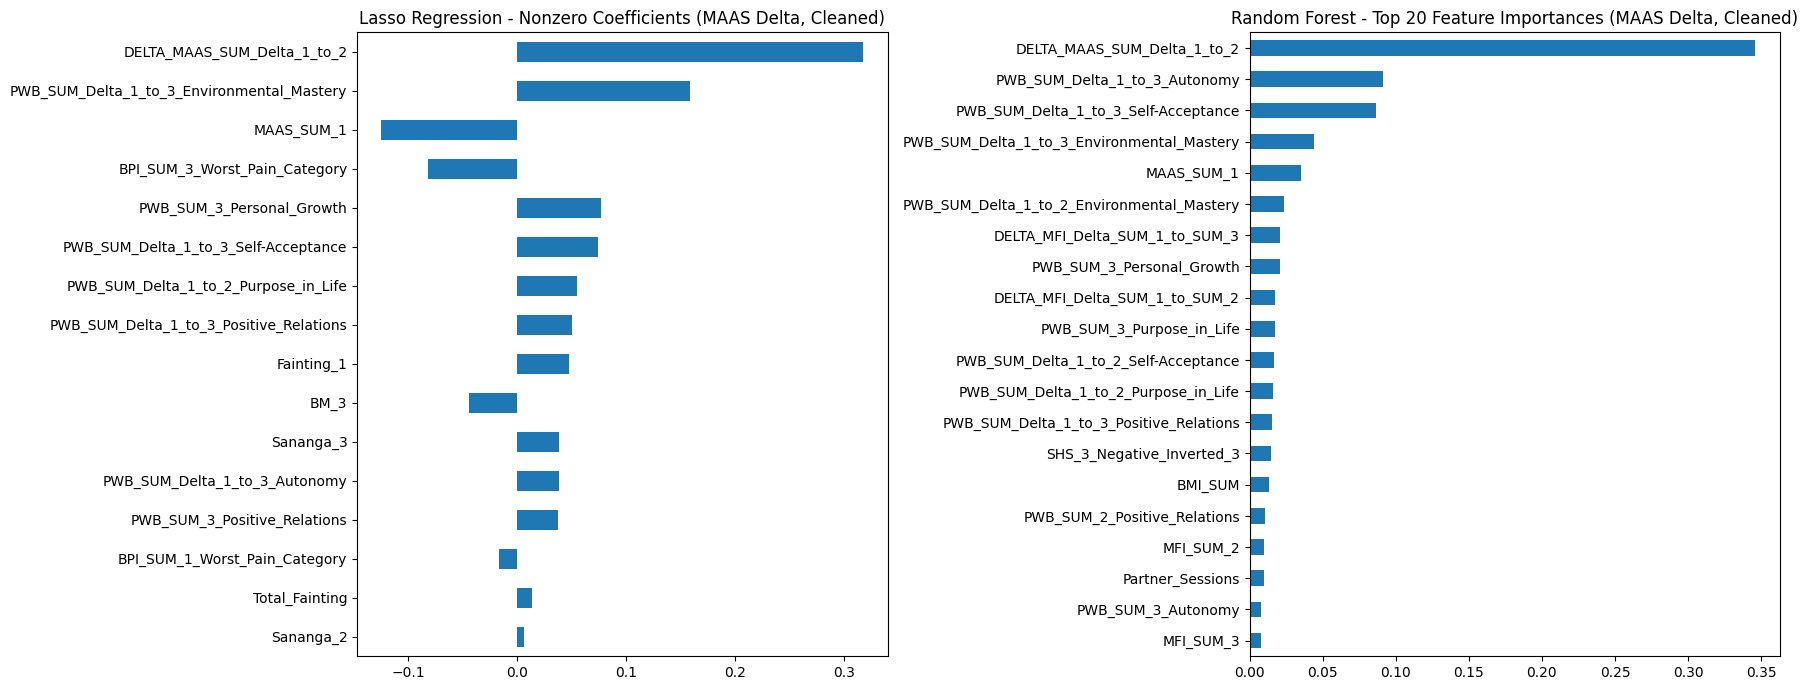

(DELTA_MAAS_SUM_Delta_1_to_2                   0.317343
 PWB_SUM_Delta_1_to_3_Environmental_Mastery    0.157951
 MAAS_SUM_1                                   -0.124985
 BPI_SUM_3_Worst_Pain_Category                -0.082382
 PWB_SUM_3_Personal_Growth                     0.076658
 PWB_SUM_Delta_1_to_3_Self-Acceptance          0.073542
 PWB_SUM_Delta_1_to_2_Purpose_in_Life          0.054759
 PWB_SUM_Delta_1_to_3_Positive_Relations       0.050466
 Fainting_1                                    0.047302
 BM_3                                         -0.044835
 dtype: float64,
 DELTA_MAAS_SUM_Delta_1_to_2                   0.345618
 PWB_SUM_Delta_1_to_3_Autonomy                 0.091054
 PWB_SUM_Delta_1_to_3_Self-Acceptance          0.086820
 PWB_SUM_Delta_1_to_3_Environmental_Mastery    0.044152
 MAAS_SUM_1                                    0.035351
 PWB_SUM_Delta_1_to_2_Environmental_Mastery    0.023401
 DELTA_MFI_Delta_SUM_1_to_SUM_3                0.020740
 PWB_SUM_3_Personal_Growth     

In [ ]:
# Remove leakage columns
leakage_vars = ['DELTA_MAAS_SUM_Delta_1_to_3', 'MAAS_SUM_3']
X_maas = X.drop(columns=[col for col in leakage_vars if col in X.columns])

# Scale the new feature matrix
X_maas_scaled = scaler.fit_transform(X_maas)

# ---------------------------
# Refit Lasso
# ---------------------------
lasso_maas_fixed = LassoCV(cv=5, random_state=42)
lasso_maas_fixed.fit(X_maas_scaled, y_maas)

lasso_coef_maas_fixed = pd.Series(lasso_maas_fixed.coef_, index=X_maas.columns)
lasso_nonzero_maas_fixed = lasso_coef_maas_fixed[lasso_coef_maas_fixed != 0].sort_values(key=abs, ascending=False)

# ---------------------------
# Refit Random Forest
# ---------------------------
rf_maas_fixed = RandomForestRegressor(n_estimators=500, random_state=42)
rf_maas_fixed.fit(X_maas, y_maas)

rf_importance_maas_fixed = pd.Series(rf_maas_fixed.feature_importances_, index=X_maas.columns)
rf_top_maas_fixed = rf_importance_maas_fixed.sort_values(ascending=False).head(20)

# ---------------------------
# Visualize
# ---------------------------
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Lasso
lasso_nonzero_maas_fixed.plot(kind='barh', ax=axes[0])
axes[0].set_title('Lasso Regression - Nonzero Coefficients (MAAS Delta, Cleaned)')
axes[0].invert_yaxis()

# RF
rf_top_maas_fixed.plot(kind='barh', ax=axes[1])
axes[1].set_title('Random Forest - Top 20 Feature Importances (MAAS Delta, Cleaned)')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

lasso_nonzero_maas_fixed.head(10), rf_top_maas_fixed.head(10)


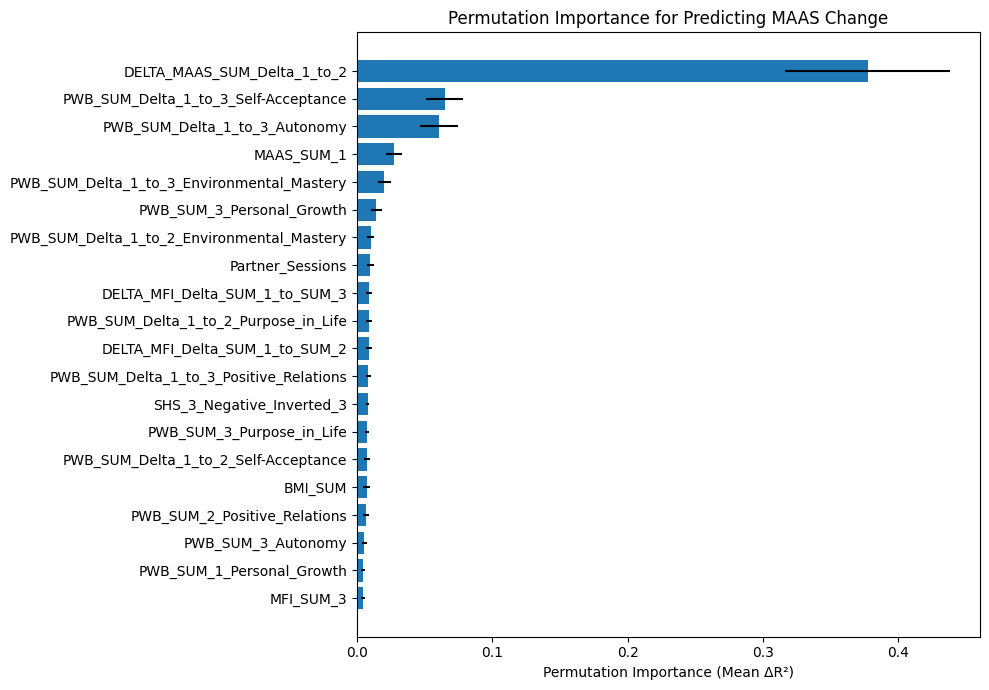

Feature  Importance       Std
0                  DELTA_MAAS_SUM_Delta_1_to_2    0.377614  0.060995
1         PWB_SUM_Delta_1_to_3_Self-Acceptance    0.064639  0.013925
2                PWB_SUM_Delta_1_to_3_Autonomy    0.060652  0.014226
3                                   MAAS_SUM_1    0.027451  0.005997
4   PWB_SUM_Delta_1_to_3_Environmental_Mastery    0.020220  0.004667
5                    PWB_SUM_3_Personal_Growth    0.014249  0.004066
6   PWB_SUM_Delta_1_to_2_Environmental_Mastery    0.010003  0.002822
7                             Partner_Sessions    0.009805  0.002654
8               DELTA_MFI_Delta_SUM_1_to_SUM_3    0.008966  0.002262
9         PWB_SUM_Delta_1_to_2_Purpose_in_Life    0.008750  0.002379
10              DELTA_MFI_Delta_SUM_1_to_SUM_2    0.008631  0.002300
11     PWB_SUM_Delta_1_to_3_Positive_Relations    0.008388  0.001916
12                   SHS_3_Negative_Inverted_3    0.007862  0.001192
13                   PWB_SUM_3_Purpose_in_Life    0.007304  0.001654
14        PWB_SUM_Delta_1_to_2_Self-Acceptance    0.007281  0.001916
15                                     BMI_SUM    0.007206  0.002512
16                PWB_SUM_2_Positive_Relations    0.006681  0.002071
17                          PWB_SUM_3_Autonomy    0.005219  0.001883
18                   PWB_SUM_1_Personal_Growth    0.004408  0.001364
19                                   MFI_SUM_3    0.004349  0.001276

In [ ]:
# Run permutation importance for MAAS outcome using the cleaned Random Forest model
perm_maas_result = permutation_importance(
    rf_maas_fixed, X_maas, y_maas,
    n_repeats=10,
    random_state=42,
    scoring='r2'
)

# Create a DataFrame of results
perm_maas_df = pd.DataFrame({
    'Feature': X_maas.columns,
    'Importance': perm_maas_result.importances_mean,
    'Std': perm_maas_result.importances_std
}).sort_values(by='Importance', ascending=False)

# Plot top 20 permutation importances
top_perm_maas = perm_maas_df.head(20)
plt.figure(figsize=(10, 7))
plt.barh(top_perm_maas['Feature'], top_perm_maas['Importance'], xerr=top_perm_maas['Std'])
plt.xlabel('Permutation Importance (Mean ΔR²)')
plt.title('Permutation Importance for Predicting MAAS Change')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

top_perm_maas.reset_index(drop=True)


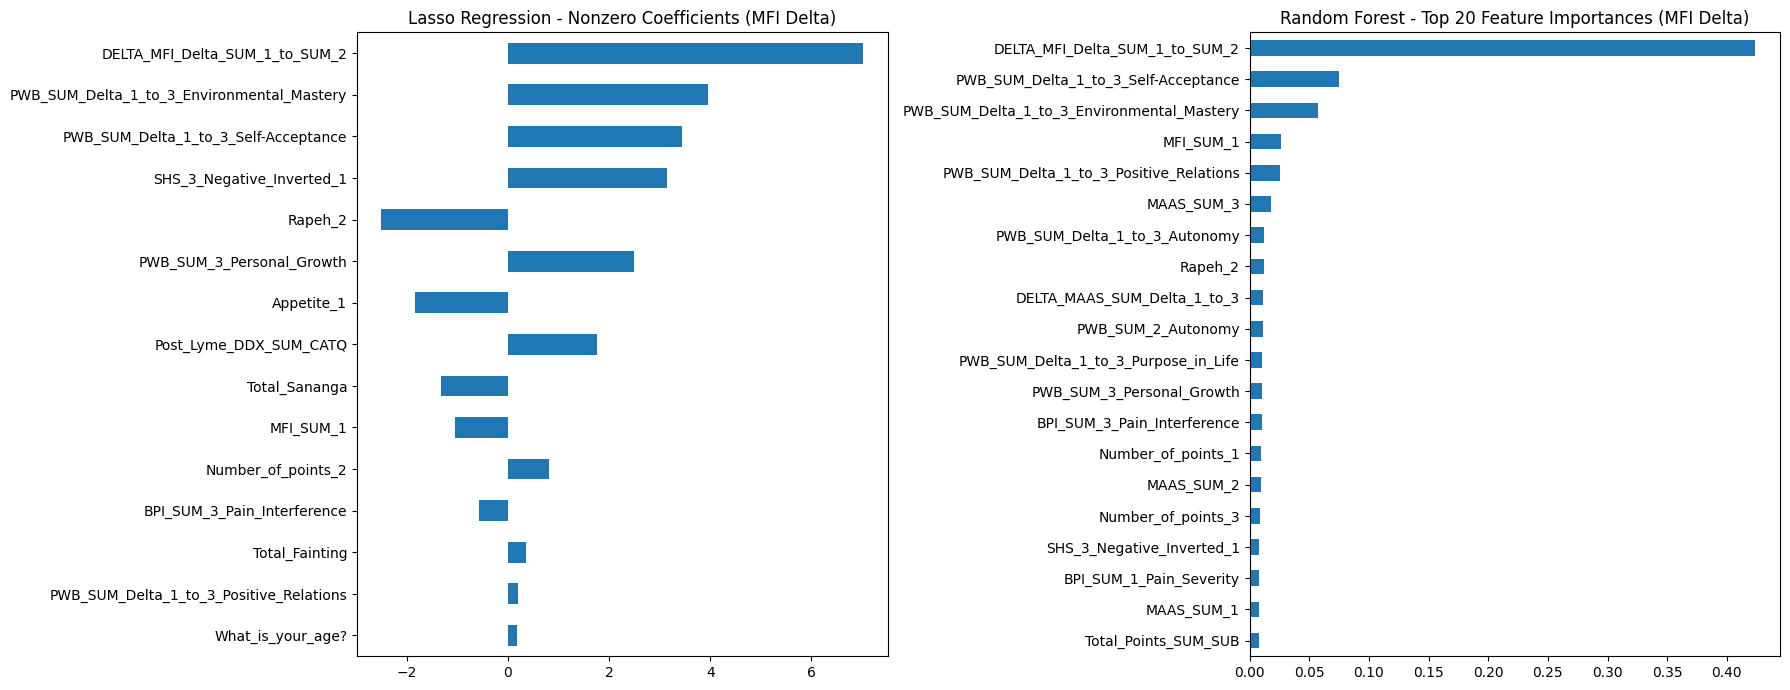

(DELTA_MFI_Delta_SUM_1_to_SUM_2                7.028248
 PWB_SUM_Delta_1_to_3_Environmental_Mastery    3.950172
 PWB_SUM_Delta_1_to_3_Self-Acceptance          3.445571
 SHS_3_Negative_Inverted_1                     3.152649
 Rapeh_2                                      -2.503492
 PWB_SUM_3_Personal_Growth                     2.500125
 Appetite_1                                   -1.843885
 Post_Lyme_DDX_SUM_CATQ                        1.770809
 Total_Sananga                                -1.325759
 MFI_SUM_1                                    -1.035324
 dtype: float64,
 DELTA_MFI_Delta_SUM_1_to_SUM_2                0.423302
 PWB_SUM_Delta_1_to_3_Self-Acceptance          0.074798
 PWB_SUM_Delta_1_to_3_Environmental_Mastery    0.057679
 MFI_SUM_1                                     0.026578
 PWB_SUM_Delta_1_to_3_Positive_Relations       0.025441
 MAAS_SUM_3                                    0.017685
 PWB_SUM_Delta_1_to_3_Autonomy                 0.012091
 Rapeh_2                       

In [ ]:
# Define outcome variable for MFI change
y_mfi = df['Outcome_Delta_MFI']

# Remove any leakage variables (e.g., DELTA MFI SUM itself or final score)
leakage_mfi_vars = ['DELTA_MFI_Delta_SUM_1_to_SUM_3', 'MFI_SUM_3']
X_mfi = X.drop(columns=[col for col in leakage_mfi_vars if col in X.columns])

# Scale features
X_mfi_scaled = scaler.fit_transform(X_mfi)

# ---------------------------
# Lasso Regression
# ---------------------------
lasso_mfi = LassoCV(cv=5, random_state=42)
lasso_mfi.fit(X_mfi_scaled, y_mfi)

lasso_coef_mfi = pd.Series(lasso_mfi.coef_, index=X_mfi.columns)
lasso_nonzero_mfi = lasso_coef_mfi[lasso_coef_mfi != 0].sort_values(key=abs, ascending=False)

# ---------------------------
# Random Forest Regression
# ---------------------------
rf_mfi = RandomForestRegressor(n_estimators=500, random_state=42)
rf_mfi.fit(X_mfi, y_mfi)

rf_importance_mfi = pd.Series(rf_mfi.feature_importances_, index=X_mfi.columns)
rf_top_mfi = rf_importance_mfi.sort_values(ascending=False).head(20)

# ---------------------------
# Visualize
# ---------------------------
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

lasso_nonzero_mfi.plot(kind='barh', ax=axes[0])
axes[0].set_title('Lasso Regression - Nonzero Coefficients (MFI Delta)')
axes[0].invert_yaxis()

rf_top_mfi.plot(kind='barh', ax=axes[1])
axes[1].set_title('Random Forest - Top 20 Feature Importances (MFI Delta)')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

lasso_nonzero_mfi.head(10), rf_top_mfi.head(10)


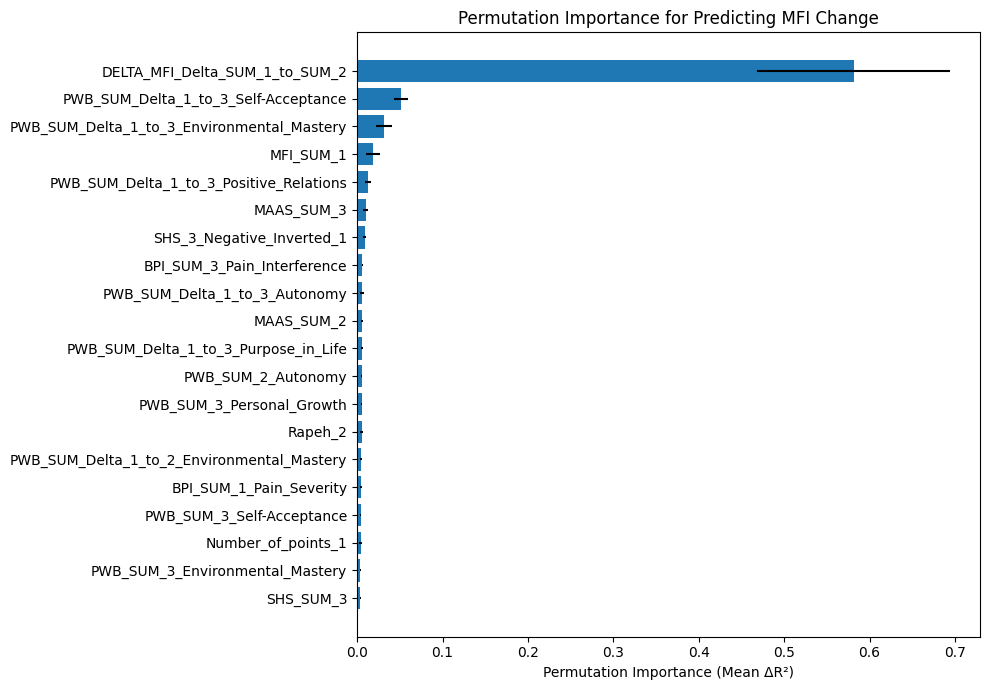

Feature  Importance       Std
0               DELTA_MFI_Delta_SUM_1_to_SUM_2    0.581200  0.113299
1         PWB_SUM_Delta_1_to_3_Self-Acceptance    0.051017  0.008279
2   PWB_SUM_Delta_1_to_3_Environmental_Mastery    0.031366  0.009513
3                                    MFI_SUM_1    0.018455  0.008079
4      PWB_SUM_Delta_1_to_3_Positive_Relations    0.013315  0.003530
5                                   MAAS_SUM_3    0.009844  0.002603
6                    SHS_3_Negative_Inverted_1    0.009060  0.001916
7                  BPI_SUM_3_Pain_Interference    0.006087  0.000856
8                PWB_SUM_Delta_1_to_3_Autonomy    0.006066  0.002260
9                                   MAAS_SUM_2    0.005706  0.000731
10        PWB_SUM_Delta_1_to_3_Purpose_in_Life    0.005505  0.001454
11                          PWB_SUM_2_Autonomy    0.005416  0.000889
12                   PWB_SUM_3_Personal_Growth    0.005293  0.000969
13                                     Rapeh_2    0.005283  0.001904
14  PWB_SUM_Delta_1_to_2_Environmental_Mastery    0.004879  0.000974
15                     BPI_SUM_1_Pain_Severity    0.004354  0.000976
16                   PWB_SUM_3_Self-Acceptance    0.004148  0.000894
17                          Number_of_points_1    0.004032  0.001464
18             PWB_SUM_3_Environmental_Mastery    0.003953  0.001051
19                                   SHS_SUM_3    0.003830  0.000725

In [ ]:
# Run permutation importance for MFI outcome
perm_mfi_result = permutation_importance(
    rf_mfi, X_mfi, y_mfi,
    n_repeats=10,
    random_state=42,
    scoring='r2'
)

# Format results into a DataFrame
perm_mfi_df = pd.DataFrame({
    'Feature': X_mfi.columns,
    'Importance': perm_mfi_result.importances_mean,
    'Std': perm_mfi_result.importances_std
}).sort_values(by='Importance', ascending=False)

# Plot top 20 features
top_perm_mfi = perm_mfi_df.head(20)
plt.figure(figsize=(10, 7))
plt.barh(top_perm_mfi['Feature'], top_perm_mfi['Importance'], xerr=top_perm_mfi['Std'])
plt.xlabel('Permutation Importance (Mean ΔR²)')
plt.title('Permutation Importance for Predicting MFI Change')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

top_perm_mfi.reset_index(drop=True)


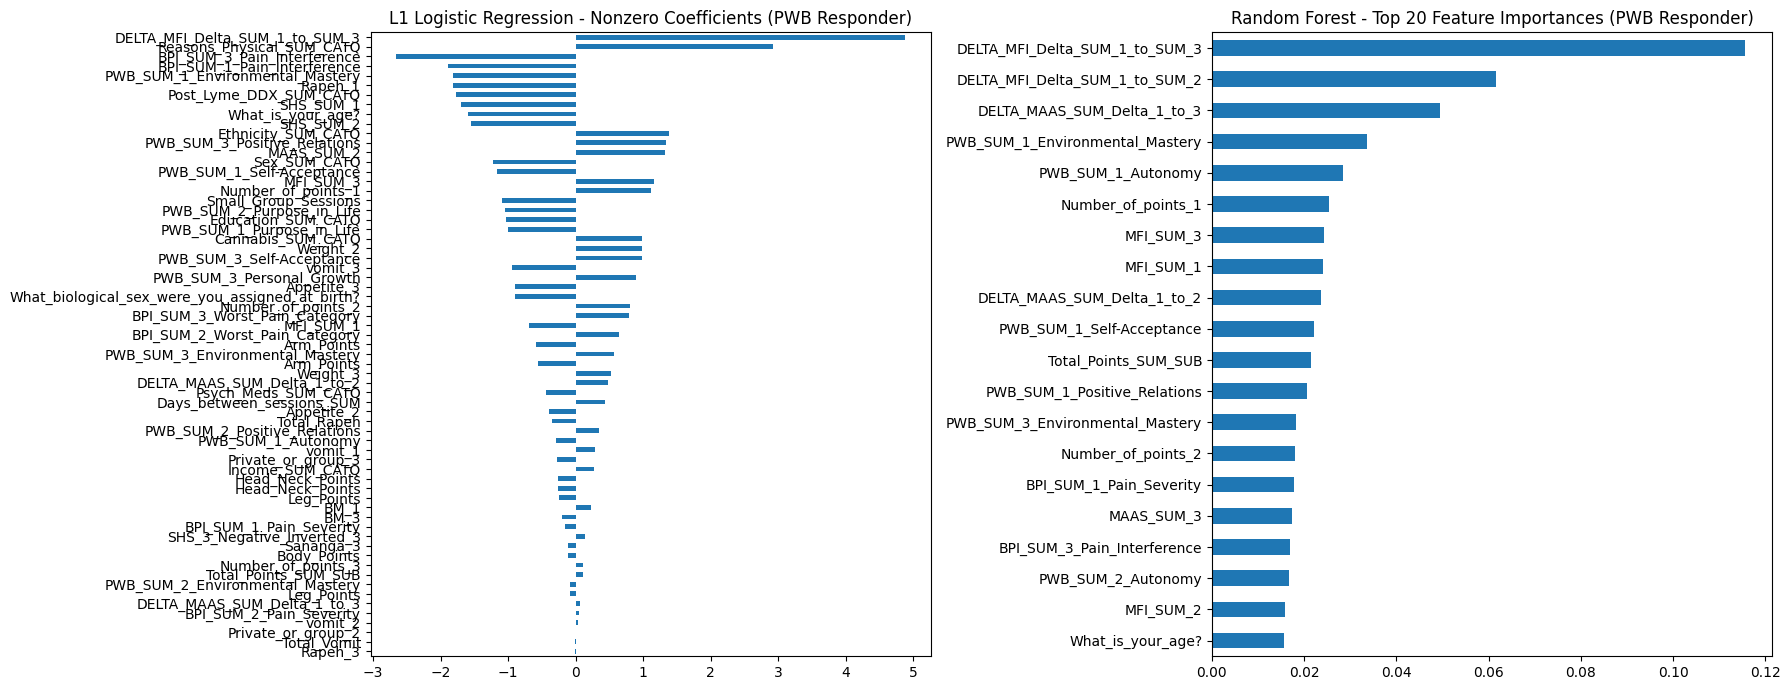

(DELTA_MFI_Delta_SUM_1_to_SUM_3     4.883659
 Reasons_Physical_SUM_CATQ          2.921692
 BPI_SUM_3_Pain_Interference       -2.658018
 BPI_SUM_1_Pain_Interference       -1.890003
 PWB_SUM_1_Environmental_Mastery   -1.819324
 Rapeh_1                           -1.811650
 Post_Lyme_DDX_SUM_CATQ            -1.767264
 SHS_SUM_1                         -1.695577
 What_is_your_age?                 -1.594624
 SHS_SUM_2                         -1.556946
 dtype: float64,
 DELTA_MFI_Delta_SUM_1_to_SUM_3     0.115639
 DELTA_MFI_Delta_SUM_1_to_SUM_2     0.061616
 DELTA_MAAS_SUM_Delta_1_to_3        0.049387
 PWB_SUM_1_Environmental_Mastery    0.033543
 PWB_SUM_1_Autonomy                 0.028324
 Number_of_points_1                 0.025292
 MFI_SUM_3                          0.024301
 MFI_SUM_1                          0.023998
 DELTA_MAAS_SUM_Delta_1_to_2        0.023657
 PWB_SUM_1_Self-Acceptance          0.022167
 dtype: float64)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Define binary target
y_pwb = df['Responder_Global_PWB']

# Drop any outcome-leaky variables (including all PWB delta or final scores)
leakage_pwb_vars = [col for col in X.columns if 'PWB' in col and ('Delta' in col or 'SUM 3' in col)]
X_pwb = X.drop(columns=leakage_pwb_vars)

# Standardize features
X_pwb_scaled = scaler.fit_transform(X_pwb)

# ---------------------------
# Logistic Regression with L1 penalty (Lasso-style)
# ---------------------------
logit = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear', scoring='roc_auc', max_iter=1000, random_state=42)
logit.fit(X_pwb_scaled, y_pwb)

# Extract non-zero coefficients
logit_coef = pd.Series(logit.coef_[0], index=X_pwb.columns)
logit_nonzero = logit_coef[logit_coef != 0].sort_values(key=abs, ascending=False)

# ---------------------------
# Random Forest Classifier
# ---------------------------
rf_pwb = RandomForestClassifier(n_estimators=500, random_state=42)
rf_pwb.fit(X_pwb, y_pwb)

# Get feature importances
rf_importance_pwb = pd.Series(rf_pwb.feature_importances_, index=X_pwb.columns)
rf_top_pwb = rf_importance_pwb.sort_values(ascending=False).head(20)

# ---------------------------
# Visualize
# ---------------------------
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

logit_nonzero.plot(kind='barh', ax=axes[0])
axes[0].set_title('L1 Logistic Regression - Nonzero Coefficients (PWB Responder)')
axes[0].invert_yaxis()

rf_top_pwb.plot(kind='barh', ax=axes[1])
axes[1].set_title('Random Forest - Top 20 Feature Importances (PWB Responder)')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

logit_nonzero.head(10), rf_top_pwb.head(10)


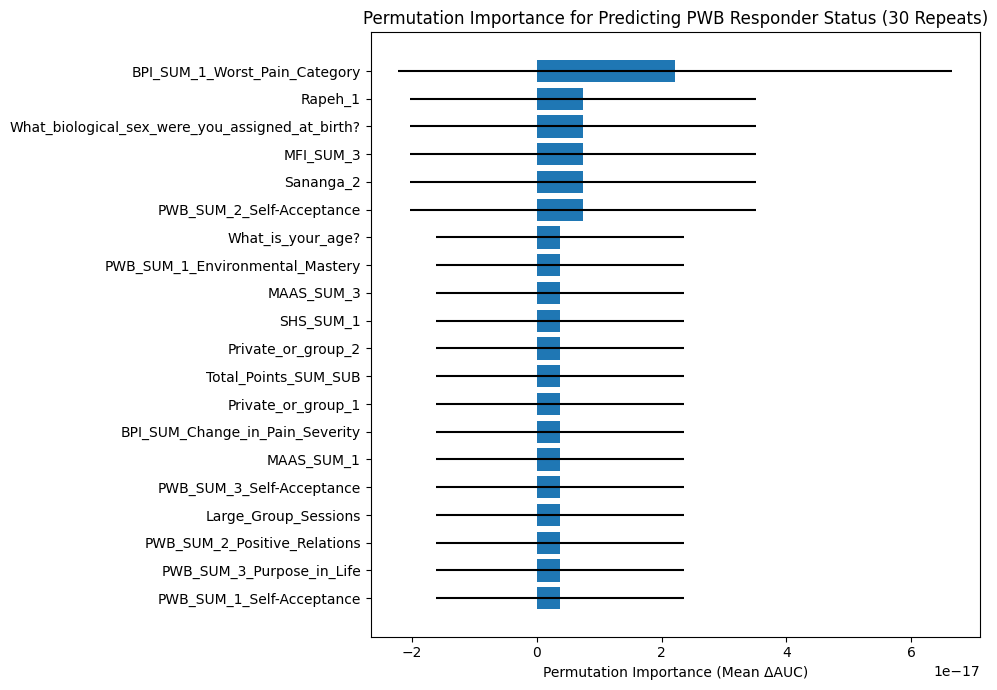

Feature    Importance  \
0                     BPI_SUM_1_Worst_Pain_Category  2.220446e-17   
1                                           Rapeh_1  7.401487e-18   
2   What_biological_sex_were_you_assigned_at_birth?  7.401487e-18   
3                                         MFI_SUM_3  7.401487e-18   
4                                         Sananga_2  7.401487e-18   
5                         PWB_SUM_2_Self-Acceptance  7.401487e-18   
6                                 What_is_your_age?  3.700743e-18   
7                   PWB_SUM_1_Environmental_Mastery  3.700743e-18   
8                                        MAAS_SUM_3  3.700743e-18   
9                                         SHS_SUM_1  3.700743e-18   
10                               Private_or_group_2  3.700743e-18   
11                             Total_Points_SUM_SUB  3.700743e-18   
12                               Private_or_group_1  3.700743e-18   
13                  BPI_SUM_Change_in_Pain_Severity  3.700743e-18   
14                                       MAAS_SUM_1  3.700743e-18   
15                        PWB_SUM_3_Self-Acceptance  3.700743e-18   
16                             Large_Group_Sessions  3.700743e-18   
17                     PWB_SUM_2_Positive_Relations  3.700743e-18   
18                        PWB_SUM_3_Purpose_in_Life  3.700743e-18   
19                        PWB_SUM_1_Self-Acceptance  3.700743e-18   

             Std  
0   4.440892e-17  
1   2.769383e-17  
2   2.769383e-17  
3   2.769383e-17  
4   2.769383e-17  
5   2.769383e-17  
6   1.992911e-17  
7   1.992911e-17  
8   1.992911e-17  
9   1.992911e-17  
10  1.992911e-17  
11  1.992911e-17  
12  1.992911e-17  
13  1.992911e-17  
14  1.992911e-17  
15  1.992911e-17  
16  1.992911e-17  
17  1.992911e-17  
18  1.992911e-17  
19  1.992911e-17

In [ ]:
# Re-run permutation importance with higher n_repeats
perm_pwb_result_repeats = permutation_importance(
    rf_pwb, X_pwb, y_pwb,
    n_repeats=30,
    random_state=42,
    scoring='roc_auc'
)

# Format results
perm_pwb_df_repeats = pd.DataFrame({
    'Feature': X_pwb.columns,
    'Importance': perm_pwb_result_repeats.importances_mean,
    'Std': perm_pwb_result_repeats.importances_std
}).sort_values(by='Importance', ascending=False)

# Plot top 20
top_perm_pwb_repeats = perm_pwb_df_repeats.head(20)
plt.figure(figsize=(10, 7))
plt.barh(top_perm_pwb_repeats['Feature'], top_perm_pwb_repeats['Importance'], xerr=top_perm_pwb_repeats['Std'])
plt.xlabel('Permutation Importance (Mean ΔAUC)')
plt.title('Permutation Importance for Predicting PWB Responder Status (30 Repeats)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

top_perm_pwb_repeats.reset_index(drop=True)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# Train/test split for binary classification
X_train, X_test, y_train, y_test = train_test_split(
    X_pwb, y_pwb, test_size=0.3, stratify=y_pwb, random_state=42
)

# Fit a new RF model for held-out validation
rf_pwb_eval = RandomForestClassifier(n_estimators=500, random_state=42)
rf_pwb_eval.fit(X_train, y_train)

# Predict probabilities and labels
y_pred_proba = rf_pwb_eval.predict_proba(X_test)[:, 1]
y_pred_label = rf_pwb_eval.predict(X_test)

# Evaluate performance
performance_metrics = {
    'AUC': roc_auc_score(y_test, y_pred_proba),
    'Accuracy': accuracy_score(y_test, y_pred_label),
    'Precision': precision_score(y_test, y_pred_label),
    'Recall': recall_score(y_test, y_pred_label),
    'F1 Score': f1_score(y_test, y_pred_label)
}

performance_metrics


{'AUC': np.float64(0.7962962962962963),
 'Accuracy': 0.7333333333333333,
 'Precision': 0.8571428571428571,
 'Recall': 0.6666666666666666,
 'F1 Score': 0.75}

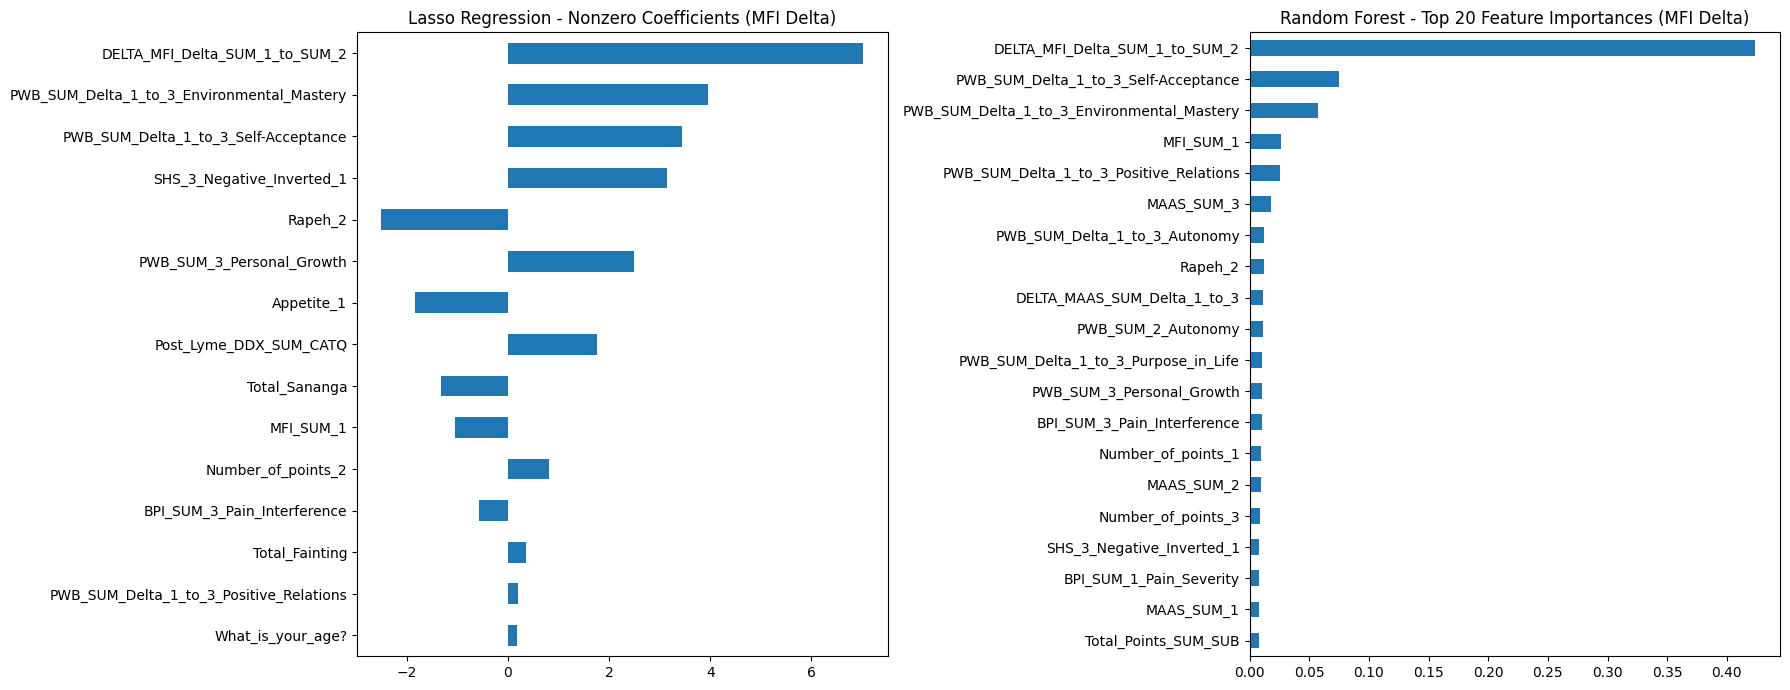

(DELTA_MFI_Delta_SUM_1_to_SUM_2                7.028248
 PWB_SUM_Delta_1_to_3_Environmental_Mastery    3.950172
 PWB_SUM_Delta_1_to_3_Self-Acceptance          3.445571
 SHS_3_Negative_Inverted_1                     3.152649
 Rapeh_2                                      -2.503492
 PWB_SUM_3_Personal_Growth                     2.500125
 Appetite_1                                   -1.843885
 Post_Lyme_DDX_SUM_CATQ                        1.770809
 Total_Sananga                                -1.325759
 MFI_SUM_1                                    -1.035324
 dtype: float64,
 DELTA_MFI_Delta_SUM_1_to_SUM_2                0.423302
 PWB_SUM_Delta_1_to_3_Self-Acceptance          0.074798
 PWB_SUM_Delta_1_to_3_Environmental_Mastery    0.057679
 MFI_SUM_1                                     0.026578
 PWB_SUM_Delta_1_to_3_Positive_Relations       0.025441
 MAAS_SUM_3                                    0.017685
 PWB_SUM_Delta_1_to_3_Autonomy                 0.012091
 Rapeh_2                       

In [ ]:
# Use the continuous MFI delta as outcome
y_mfi_regression = df['Outcome_Delta_MFI']

# Drop leakage variables again to avoid target contamination
leakage_vars_mfi = ['DELTA_MFI_Delta_SUM_1_to_SUM_3', 'MFI_SUM_3']
X_mfi_regression = X.drop(columns=[col for col in leakage_vars_mfi if col in X.columns])

# Standardize features
X_mfi_reg_scaled = scaler.fit_transform(X_mfi_regression)

# ---------------------------
# Lasso Regression
# ---------------------------
lasso_mfi_reg = LassoCV(cv=5, random_state=42)
lasso_mfi_reg.fit(X_mfi_reg_scaled, y_mfi_regression)

lasso_coef_mfi_reg = pd.Series(lasso_mfi_reg.coef_, index=X_mfi_regression.columns)
lasso_nonzero_mfi_reg = lasso_coef_mfi_reg[lasso_coef_mfi_reg != 0].sort_values(key=abs, ascending=False)

# ---------------------------
# Random Forest Regression
# ---------------------------
rf_mfi_reg = RandomForestRegressor(n_estimators=500, random_state=42)
rf_mfi_reg.fit(X_mfi_regression, y_mfi_regression)

rf_importance_mfi_reg = pd.Series(rf_mfi_reg.feature_importances_, index=X_mfi_regression.columns)
rf_top_mfi_reg = rf_importance_mfi_reg.sort_values(ascending=False).head(20)

# ---------------------------
# Visualize
# ---------------------------
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

lasso_nonzero_mfi_reg.plot(kind='barh', ax=axes[0])
axes[0].set_title('Lasso Regression - Nonzero Coefficients (MFI Delta)')
axes[0].invert_yaxis()

rf_top_mfi_reg.plot(kind='barh', ax=axes[1])
axes[1].set_title('Random Forest - Top 20 Feature Importances (MFI Delta)')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

lasso_nonzero_mfi_reg.head(10), rf_top_mfi_reg.head(10)


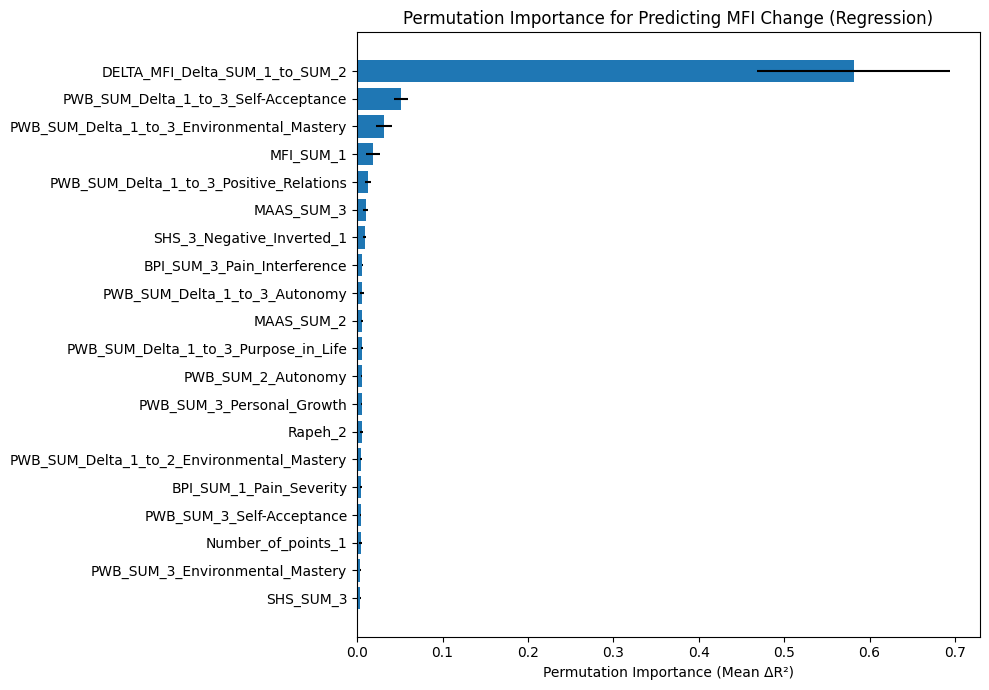

Feature  Importance       Std
0               DELTA_MFI_Delta_SUM_1_to_SUM_2    0.581200  0.113299
1         PWB_SUM_Delta_1_to_3_Self-Acceptance    0.051017  0.008279
2   PWB_SUM_Delta_1_to_3_Environmental_Mastery    0.031366  0.009513
3                                    MFI_SUM_1    0.018455  0.008079
4      PWB_SUM_Delta_1_to_3_Positive_Relations    0.013315  0.003530
5                                   MAAS_SUM_3    0.009844  0.002603
6                    SHS_3_Negative_Inverted_1    0.009060  0.001916
7                  BPI_SUM_3_Pain_Interference    0.006087  0.000856
8                PWB_SUM_Delta_1_to_3_Autonomy    0.006066  0.002260
9                                   MAAS_SUM_2    0.005706  0.000731
10        PWB_SUM_Delta_1_to_3_Purpose_in_Life    0.005505  0.001454
11                          PWB_SUM_2_Autonomy    0.005416  0.000889
12                   PWB_SUM_3_Personal_Growth    0.005293  0.000969
13                                     Rapeh_2    0.005283  0.001904
14  PWB_SUM_Delta_1_to_2_Environmental_Mastery    0.004879  0.000974
15                     BPI_SUM_1_Pain_Severity    0.004354  0.000976
16                   PWB_SUM_3_Self-Acceptance    0.004148  0.000894
17                          Number_of_points_1    0.004032  0.001464
18             PWB_SUM_3_Environmental_Mastery    0.003953  0.001051
19                                   SHS_SUM_3    0.003830  0.000725

In [ ]:
# Run permutation importance for MFI delta regression model
perm_mfi_reg_result = permutation_importance(
    rf_mfi_reg, X_mfi_regression, y_mfi_regression,
    n_repeats=10,
    random_state=42,
    scoring='r2'
)

# Format results
perm_mfi_reg_df = pd.DataFrame({
    'Feature': X_mfi_regression.columns,
    'Importance': perm_mfi_reg_result.importances_mean,
    'Std': perm_mfi_reg_result.importances_std
}).sort_values(by='Importance', ascending=False)

# Plot top 20
top_perm_mfi_reg = perm_mfi_reg_df.head(20)
plt.figure(figsize=(10, 7))
plt.barh(top_perm_mfi_reg['Feature'], top_perm_mfi_reg['Importance'], xerr=top_perm_mfi_reg['Std'])
plt.xlabel('Permutation Importance (Mean ΔR²)')
plt.title('Permutation Importance for Predicting MFI Change (Regression)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

top_perm_mfi_reg.reset_index(drop=True)


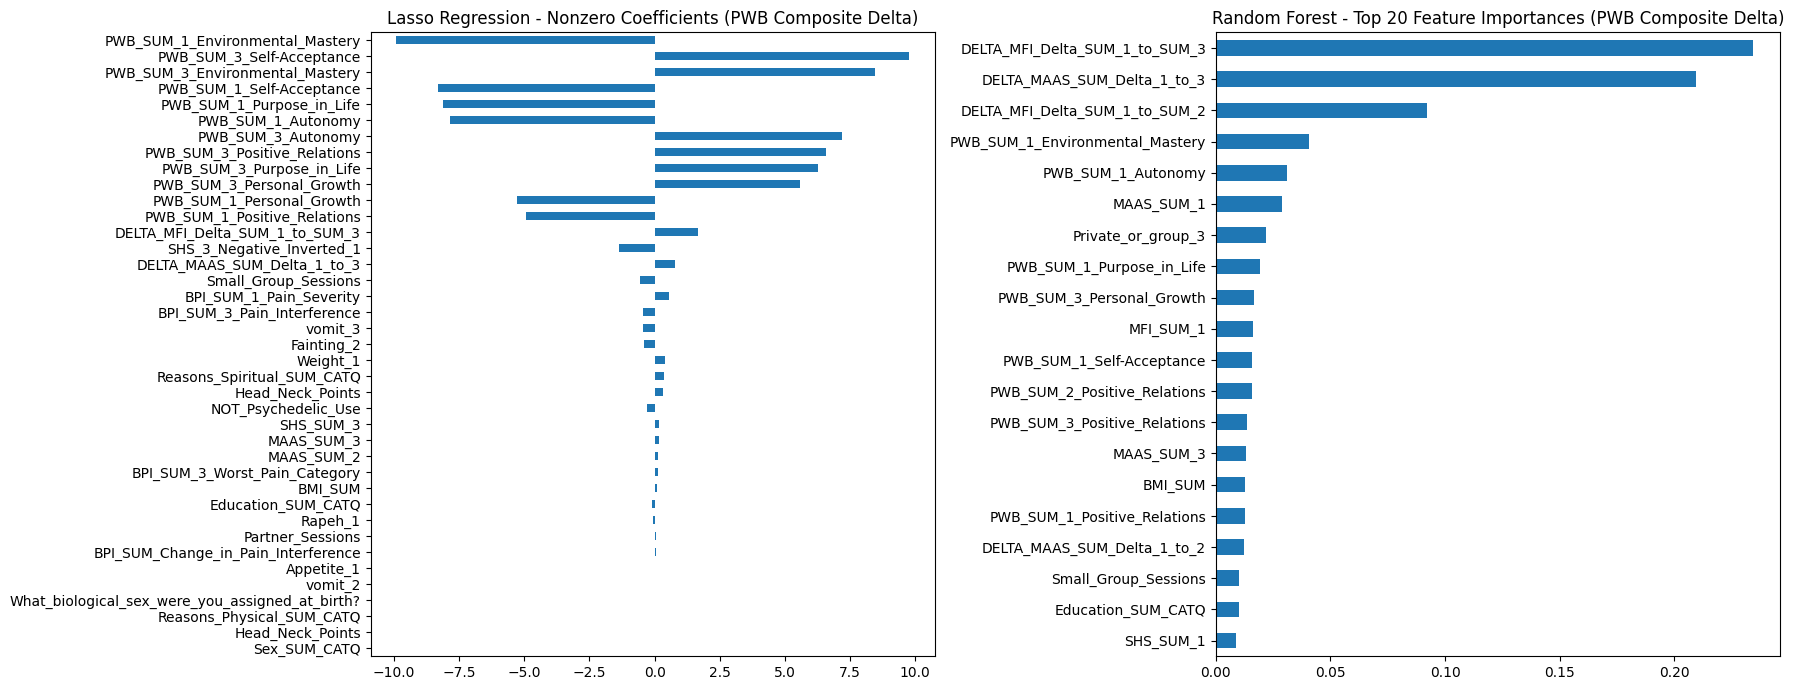

(PWB_SUM_1_Environmental_Mastery   -9.908813
 PWB_SUM_3_Self-Acceptance          9.768998
 PWB_SUM_3_Environmental_Mastery    8.465343
 PWB_SUM_1_Self-Acceptance         -8.306051
 PWB_SUM_1_Purpose_in_Life         -8.102469
 PWB_SUM_1_Autonomy                -7.843088
 PWB_SUM_3_Autonomy                 7.180675
 PWB_SUM_3_Positive_Relations       6.560986
 PWB_SUM_3_Purpose_in_Life          6.258499
 PWB_SUM_3_Personal_Growth          5.591730
 dtype: float64,
 DELTA_MFI_Delta_SUM_1_to_SUM_3     0.234422
 DELTA_MAAS_SUM_Delta_1_to_3        0.209498
 DELTA_MFI_Delta_SUM_1_to_SUM_2     0.091927
 PWB_SUM_1_Environmental_Mastery    0.040671
 PWB_SUM_1_Autonomy                 0.031213
 MAAS_SUM_1                         0.029029
 Private_or_group_3                 0.021668
 PWB_SUM_1_Purpose_in_Life          0.019327
 PWB_SUM_3_Personal_Growth          0.016507
 MFI_SUM_1                          0.016176
 dtype: float64)

In [ ]:
# Use a continuous PWB outcome: sum of deltas across all 6 domains
pwb_delta_columns = [
    'PWB_SUM_Delta_1_to_3_Autonomy',
    'PWB_SUM_Delta_1_to_3_Environmental_Mastery',
    'PWB_SUM_Delta_1_to_3_Personal_Growth',
    'PWB_SUM_Delta_1_to_3_Positive_Relations',
    'PWB_SUM_Delta_1_to_3_Purpose_in_Life',
    'PWB_SUM_Delta_1_to_3_Self-Acceptance'
]
df['PWB_Composite_Delta'] = df[pwb_delta_columns].sum(axis=1)
y_pwb_regression = df['PWB_Composite_Delta']

# Remove PWB-related predictors (delta and final scores)
leakage_vars_pwb = [col for col in X.columns if 'PWB' in col and ('SUM 3' in col or 'Delta' in col)]
X_pwb_regression = X.drop(columns=leakage_vars_pwb)

# Standardize features
X_pwb_reg_scaled = scaler.fit_transform(X_pwb_regression)

# ---------------------------
# Lasso Regression
# ---------------------------
lasso_pwb_reg = LassoCV(cv=5, random_state=42)
lasso_pwb_reg.fit(X_pwb_reg_scaled, y_pwb_regression)

lasso_coef_pwb_reg = pd.Series(lasso_pwb_reg.coef_, index=X_pwb_regression.columns)
lasso_nonzero_pwb_reg = lasso_coef_pwb_reg[lasso_coef_pwb_reg != 0].sort_values(key=abs, ascending=False)

# ---------------------------
# Random Forest Regression
# ---------------------------
rf_pwb_reg = RandomForestRegressor(n_estimators=500, random_state=42)
rf_pwb_reg.fit(X_pwb_regression, y_pwb_regression)

rf_importance_pwb_reg = pd.Series(rf_pwb_reg.feature_importances_, index=X_pwb_regression.columns)
rf_top_pwb_reg = rf_importance_pwb_reg.sort_values(ascending=False).head(20)

# ---------------------------
# Visualize
# ---------------------------
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

lasso_nonzero_pwb_reg.plot(kind='barh', ax=axes[0])
axes[0].set_title('Lasso Regression - Nonzero Coefficients (PWB Composite Delta)')
axes[0].invert_yaxis()

rf_top_pwb_reg.plot(kind='barh', ax=axes[1])
axes[1].set_title('Random Forest - Top 20 Feature Importances (PWB Composite Delta)')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

lasso_nonzero_pwb_reg.head(10), rf_top_pwb_reg.head(10)


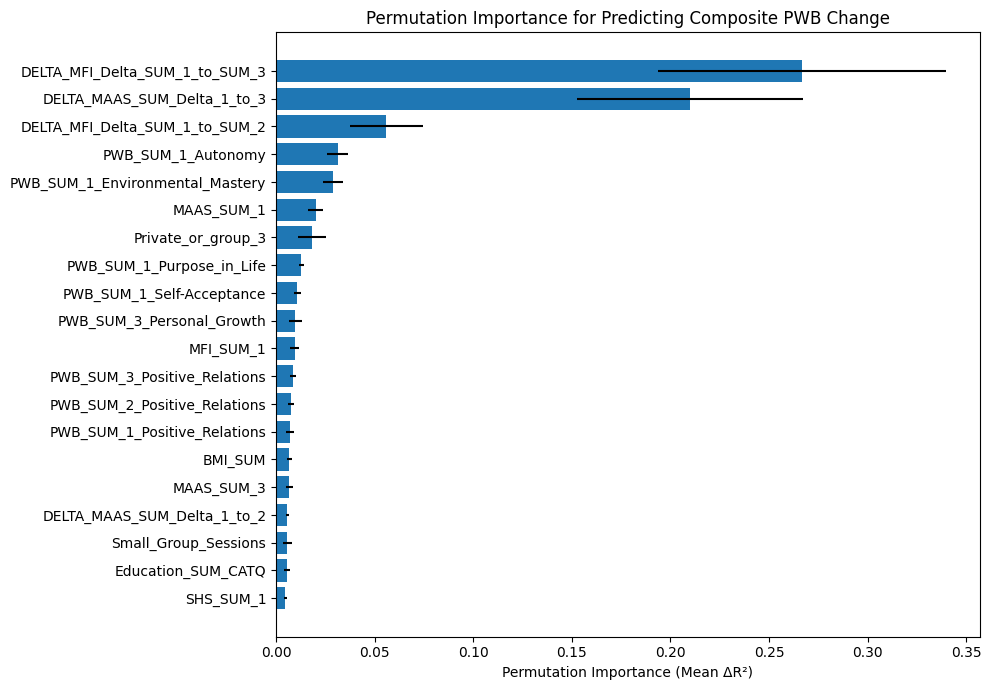

Feature  Importance       Std
0    DELTA_MFI_Delta_SUM_1_to_SUM_3    0.266773  0.073202
1       DELTA_MAAS_SUM_Delta_1_to_3    0.209954  0.057146
2    DELTA_MFI_Delta_SUM_1_to_SUM_2    0.055781  0.018544
3                PWB_SUM_1_Autonomy    0.031331  0.005352
4   PWB_SUM_1_Environmental_Mastery    0.028908  0.005226
5                        MAAS_SUM_1    0.020001  0.004043
6                Private_or_group_3    0.018233  0.007051
7         PWB_SUM_1_Purpose_in_Life    0.012874  0.001250
8         PWB_SUM_1_Self-Acceptance    0.010837  0.001570
9         PWB_SUM_3_Personal_Growth    0.009841  0.003531
10                        MFI_SUM_1    0.009336  0.002497
11     PWB_SUM_3_Positive_Relations    0.008530  0.001371
12     PWB_SUM_2_Positive_Relations    0.007572  0.001701
13     PWB_SUM_1_Positive_Relations    0.007165  0.002042
14                          BMI_SUM    0.006778  0.001368
15                       MAAS_SUM_3    0.006750  0.001733
16      DELTA_MAAS_SUM_Delta_1_to_2    0.005780  0.000870
17             Small_Group_Sessions    0.005731  0.002291
18               Education_SUM_CATQ    0.005677  0.001503
19                        SHS_SUM_1    0.004667  0.000709

In [ ]:
# Run permutation importance for composite PWB regression model
perm_pwb_reg_result = permutation_importance(
    rf_pwb_reg, X_pwb_regression, y_pwb_regression,
    n_repeats=10,
    random_state=42,
    scoring='r2'
)

# Format results
perm_pwb_reg_df = pd.DataFrame({
    'Feature': X_pwb_regression.columns,
    'Importance': perm_pwb_reg_result.importances_mean,
    'Std': perm_pwb_reg_result.importances_std
}).sort_values(by='Importance', ascending=False)

# Plot top 20
top_perm_pwb_reg = perm_pwb_reg_df.head(20)
plt.figure(figsize=(10, 7))
plt.barh(top_perm_pwb_reg['Feature'], top_perm_pwb_reg['Importance'], xerr=top_perm_pwb_reg['Std'])
plt.xlabel('Permutation Importance (Mean ΔR²)')
plt.title('Permutation Importance for Predicting Composite PWB Change')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

top_perm_pwb_reg.reset_index(drop=True)


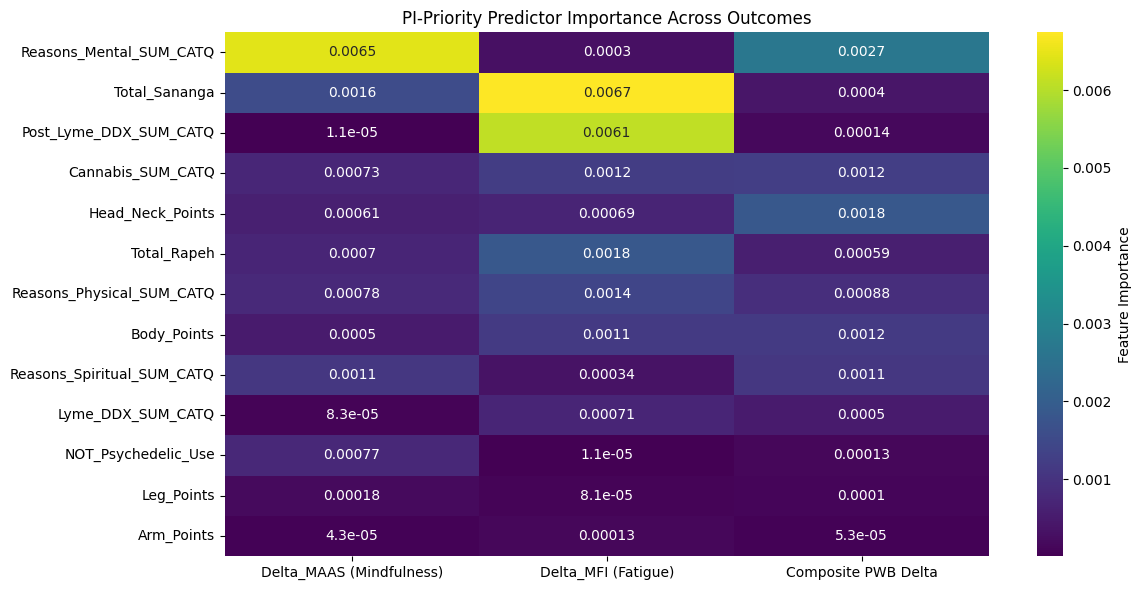

In [ ]:
# Define a list of PI-priority predictors
pi_predictors = [
    'Total_Sananga', 'Total_Rapeh',
    'NOT_Psychedelic_Use', 'Cannabis_SUM_CATQ',
    'Lyme_DDX_SUM_CATQ', 'Post_Lyme_DDX_SUM_CATQ',
    'Reasons_Physical_SUM_CATQ', 'Reasons_Mental_SUM_CATQ', 'Reasons_Spiritual_SUM_CATQ',
    'Head_Neck_Points', 'Body_Points', 'Arm_Points', 'Leg_Points'
]

# Define the models and their corresponding feature importance Series
summary_dict = {
    'Delta_IDSSR (Depression)': rf_importance_maas if 'rf_importance_maas' in globals() else None,
    'Delta_MAAS (Mindfulness)': rf_importance_maas_fixed if 'rf_importance_maas_fixed' in globals() else None,
    'Delta_MFI (Fatigue)': rf_importance_mfi_reg if 'rf_importance_mfi_reg' in globals() else None,
    'Composite PWB Delta': rf_importance_pwb_reg if 'rf_importance_pwb_reg' in globals() else None,
}

# Compile a DataFrame summarizing PI-priority predictor importance across models
summary_table = pd.DataFrame(index=pi_predictors)

for outcome, importance in summary_dict.items():
    if importance is not None:
        # Drop duplicate feature names (keep max importance per feature)
        importance_dedup = importance.groupby(importance.index).max()
        summary_table[outcome] = importance_dedup.reindex(pi_predictors).fillna(0)

# Sort rows by sum of importance across all models
summary_table['Total_Importance'] = summary_table.sum(axis=1)
summary_table = summary_table.sort_values(by='Total_Importance', ascending=False).drop(columns='Total_Importance')

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Visual heatmap of importance scores
plt.figure(figsize=(12, 6))
sns.heatmap(summary_table, annot=True, cmap='viridis', cbar_kws={'label': 'Feature Importance'})
plt.title('PI-Priority Predictor Importance Across Outcomes')
plt.tight_layout()
plt.show()


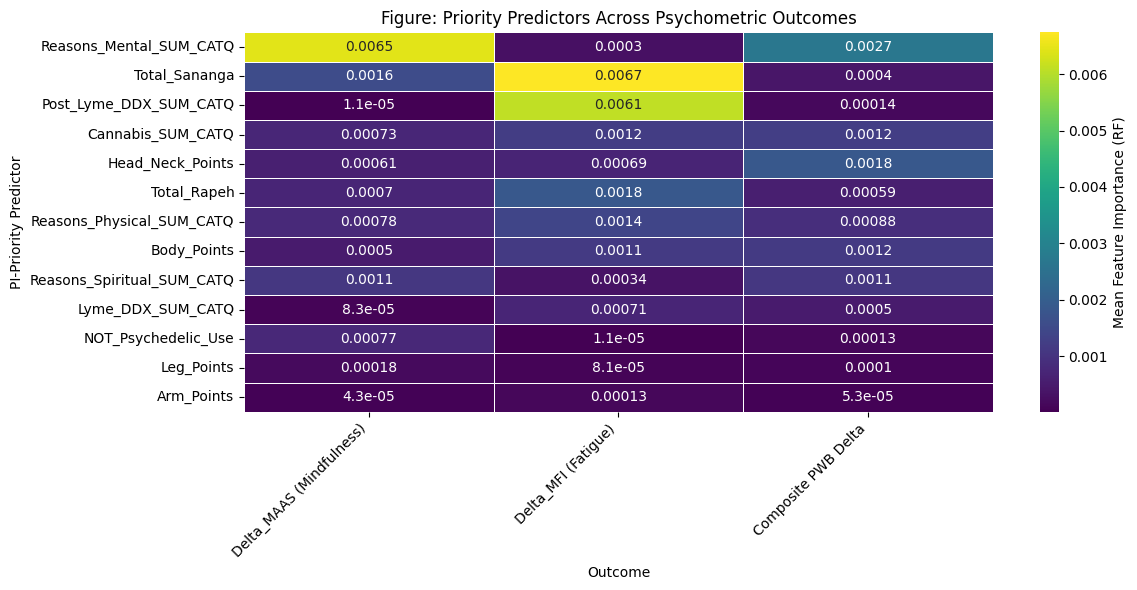

In [ ]:
# Apply the deduplication fix to build a clean summary table
summary_table_fixed = pd.DataFrame(index=pi_predictors)

for outcome, importance in summary_dict.items():
    if importance is not None:
        importance_dedup = importance.groupby(importance.index).max()
        summary_table_fixed[outcome] = importance_dedup.reindex(pi_predictors).fillna(0)

# Sort by total importance
summary_table_fixed['Total_Importance'] = summary_table_fixed.sum(axis=1)
summary_table_fixed = summary_table_fixed.sort_values(by='Total_Importance', ascending=False)
summary_table_final = summary_table_fixed.drop(columns='Total_Importance')

# Create heatmap-style figure for manuscript
plt.figure(figsize=(12, 6))
ax = sns.heatmap(
    summary_table_final,
    annot=True,
    cmap='viridis',
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'Mean Feature Importance (RF)'}
)
plt.title('Figure: Priority Predictors Across Psychometric Outcomes')
plt.xlabel('Outcome')
plt.ylabel('PI-Priority Predictor')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


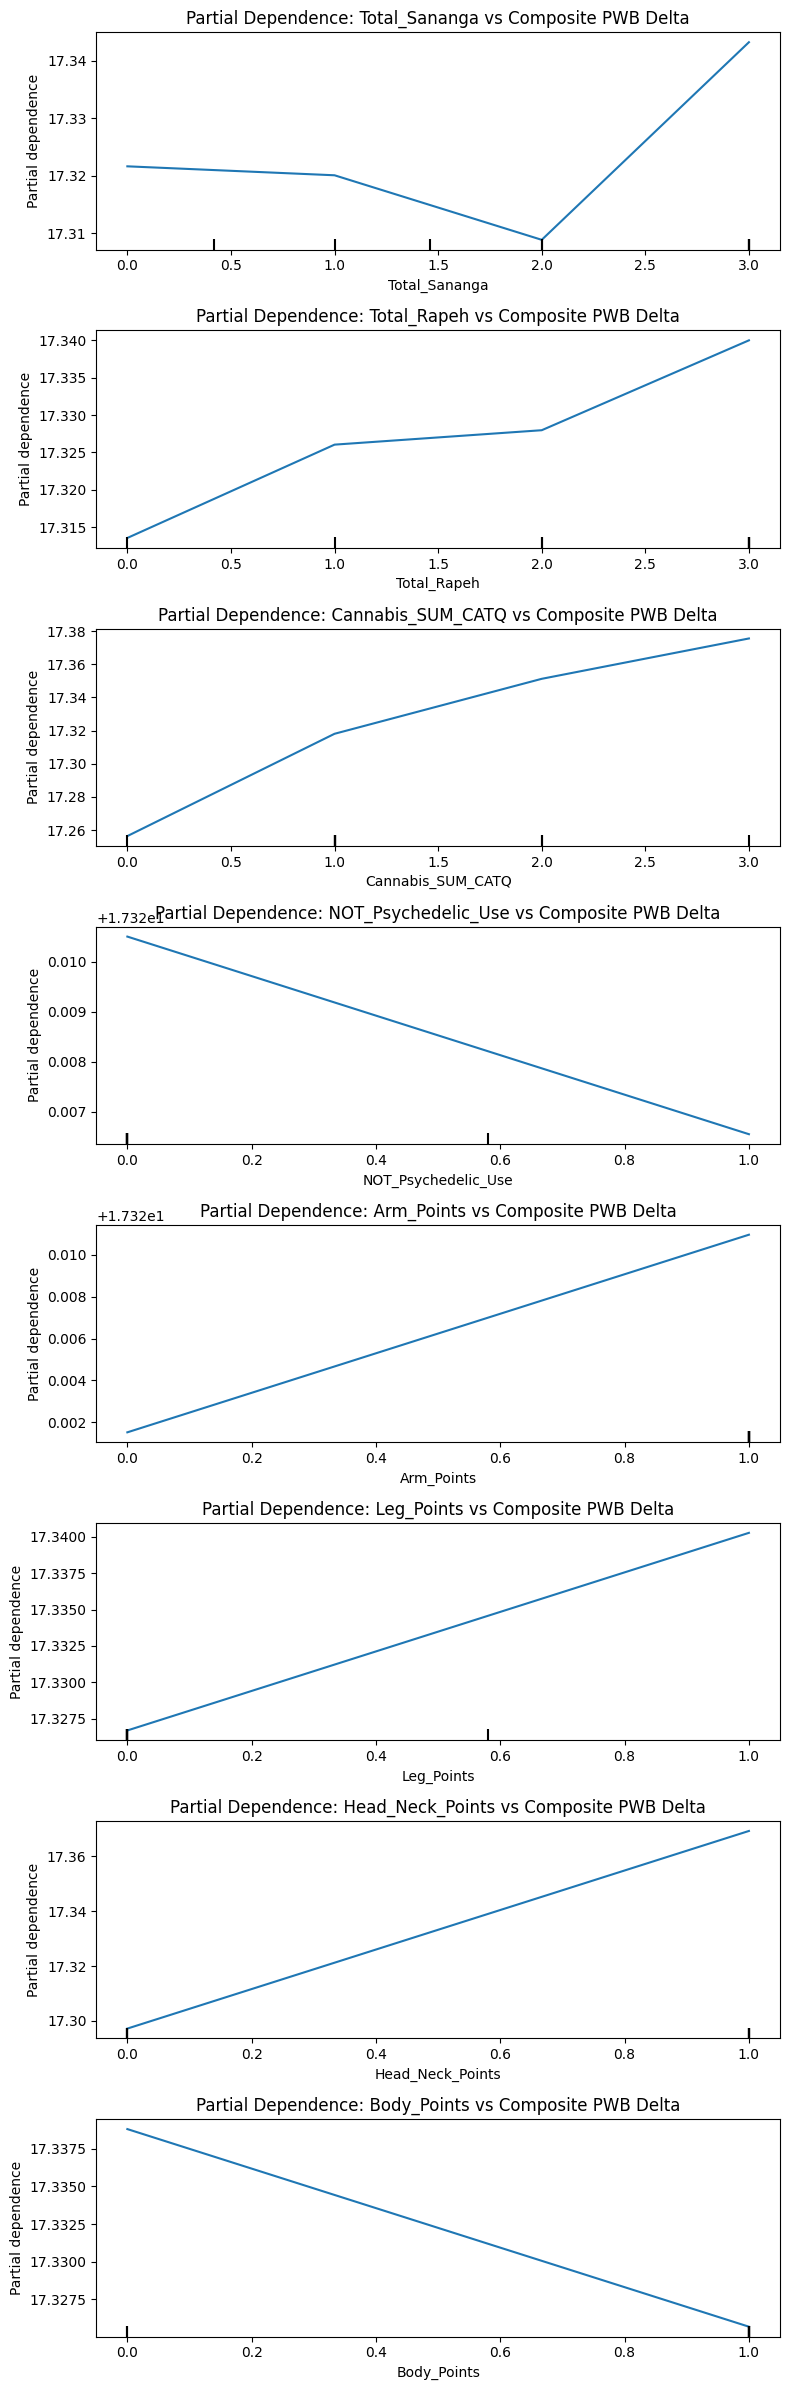

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

# We'll use the composite PWB regression model since it's broadest
# Features to plot PDPs for: ritual + substance history + point location
pdp_features = [
    'Total_Sananga',
    'Total_Rapeh',
    'Cannabis_SUM_CATQ',
    'NOT_Psychedelic_Use',
    'Arm_Points',
    'Leg_Points',
    'Head_Neck_Points',
    'Body_Points'
]

# Plot partial dependence for each feature (one plot per feature)
fig, ax = plt.subplots(len(pdp_features), 1, figsize=(8, 3 * len(pdp_features)))

X_pwb_regression = X_pwb_regression.loc[:, ~X_pwb_regression.columns.duplicated()]

for i, feature in enumerate(pdp_features):
    display = PartialDependenceDisplay.from_estimator(
        rf_pwb_reg,
        X_pwb_regression,
        [feature],
        ax=ax[i],
        kind='average',
        grid_resolution=20
    )
    ax[i].set_title(f'Partial Dependence: {feature} vs Composite PWB Delta')

plt.tight_layout()
plt.show()


Bootstrapping Lasso:   0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.784e+01, tolerance: 2.774e+00
  model = cd_fast.enet_coordinate_descent(
Bootstrapping Lasso:   0%|          | 3/1000 [00:00<01:26, 11.48it/s]/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.455e+01, tolerance: 3.878e+00
  model = cd_fast.enet_coordinate_descent(
Bootstrapping Lasso:   0%|          | 5/1000 [00:00<01:30, 10.97it/s]/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWar

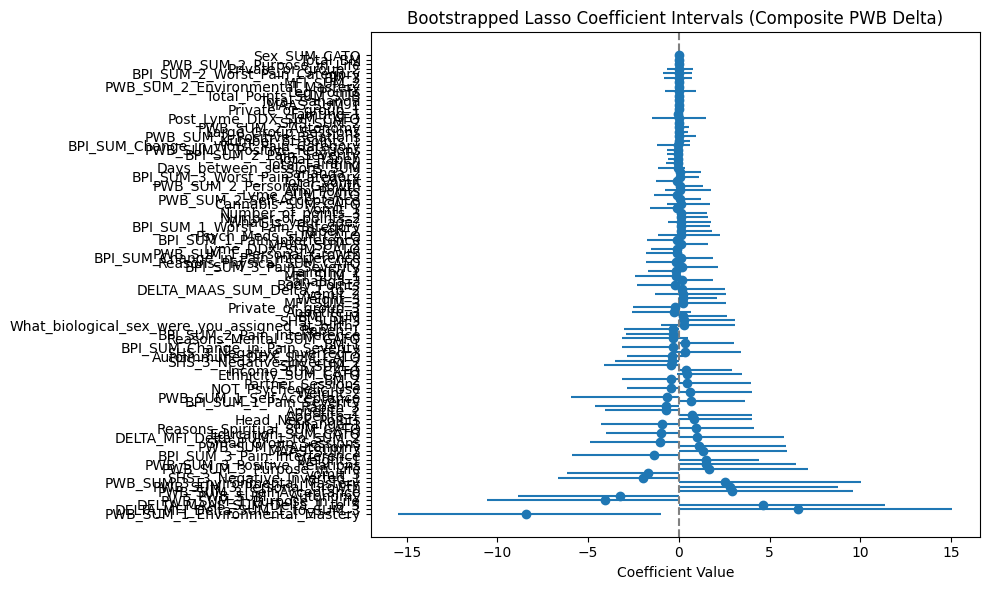

In [ ]:
from sklearn.utils import resample
from tqdm import tqdm

# Set up for bootstrapping Lasso coefficients
n_bootstraps = 1000
bootstrap_coefs = pd.DataFrame(index=X_pwb_regression.columns)

# Fit Lasso to each bootstrap sample and collect coefficients
for i in tqdm(range(n_bootstraps), desc="Bootstrapping Lasso"):
    X_resampled, y_resampled = resample(X_pwb_regression, y_pwb_regression, random_state=i)
    X_resampled_scaled = scaler.fit_transform(X_resampled)
    lasso = LassoCV(cv=5, random_state=i).fit(X_resampled_scaled, y_resampled)
    bootstrap_coefs[f'Iter_{i}'] = pd.Series(lasso.coef_, index=X_pwb_regression.columns)

# Compute mean and 95% confidence intervals
coef_summary = pd.DataFrame({
    'Mean': bootstrap_coefs.mean(axis=1),
    'Lower 95% CI': bootstrap_coefs.quantile(0.025, axis=1),
    'Upper 95% CI': bootstrap_coefs.quantile(0.975, axis=1)
})

# Filter to nonzero mean coefficients
coef_summary_nonzero = coef_summary[coef_summary['Mean'] != 0].sort_values(by='Mean', key=abs, ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.errorbar(
    coef_summary_nonzero['Mean'],
    coef_summary_nonzero.index,
    xerr=[
    (coef_summary_nonzero['Mean'] - coef_summary_nonzero['Lower 95% CI']).abs(),
    (coef_summary_nonzero['Upper 95% CI'] - coef_summary_nonzero['Mean']).abs()
    ],
    fmt='o'
)
plt.axvline(0, linestyle='--', color='gray')
plt.title('Bootstrapped Lasso Coefficient Intervals (Composite PWB Delta)')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()


In [ ]:
# Define binary target for MFI improvement
y_mfi_binary = df['Responder_MFI']

# Remove leakage variables for MFI (especially post-session scores and deltas)
leakage_mfi_binary = [col for col in X.columns if 'MFI SUM 3' in col or 'DELTA MFI' in col]
X_mfi_binary = X.drop(columns=leakage_mfi_binary)

# Train/test split
X_train_mfi, X_test_mfi, y_train_mfi, y_test_mfi = train_test_split(
    X_mfi_binary, y_mfi_binary, test_size=0.3, stratify=y_mfi_binary, random_state=42
)

# Train RF classifier
rf_mfi_binary = RandomForestClassifier(n_estimators=500, random_state=42)
rf_mfi_binary.fit(X_train_mfi, y_train_mfi)

# Predict on test set
y_pred_proba_mfi = rf_mfi_binary.predict_proba(X_test_mfi)[:, 1]
y_pred_label_mfi = rf_mfi_binary.predict(X_test_mfi)

# Evaluate performance
performance_mfi_binary = {
    'AUC': roc_auc_score(y_test_mfi, y_pred_proba_mfi),
    'Accuracy': accuracy_score(y_test_mfi, y_pred_label_mfi),
    'Precision': precision_score(y_test_mfi, y_pred_label_mfi),
    'Recall': recall_score(y_test_mfi, y_pred_label_mfi),
    'F1 Score': f1_score(y_test_mfi, y_pred_label_mfi)
}

performance_mfi_binary


{'AUC': np.float64(1.0),
 'Accuracy': 0.9333333333333333,
 'Precision': 1.0,
 'Recall': 0.75,
 'F1 Score': 0.8571428571428571}

In [ ]:
# Retry with class_weight='balanced' to address class imbalance
rf_mfi_binary_balanced = RandomForestClassifier(n_estimators=500, random_state=42, class_weight='balanced')
rf_mfi_binary_balanced.fit(X_train_mfi, y_train_mfi)

# Predict again on the test set
y_pred_proba_balanced = rf_mfi_binary_balanced.predict_proba(X_test_mfi)[:, 1]
y_pred_label_balanced = rf_mfi_binary_balanced.predict(X_test_mfi)

# Evaluate new performance
performance_mfi_balanced = {
    'AUC': roc_auc_score(y_test_mfi, y_pred_proba_balanced),
    'Accuracy': accuracy_score(y_test_mfi, y_pred_label_balanced),
    'Precision': precision_score(y_test_mfi, y_pred_label_balanced),
    'Recall': recall_score(y_test_mfi, y_pred_label_balanced),
    'F1 Score': f1_score(y_test_mfi, y_pred_label_balanced)
}

performance_mfi_balanced


{'AUC': np.float64(1.0),
 'Accuracy': 0.9333333333333333,
 'Precision': 1.0,
 'Recall': 0.75,
 'F1 Score': 0.8571428571428571}

In [ ]:
# Collect performance metrics from prior models
performance_summary = pd.DataFrame({
    'Outcome': [
        'IDSSR (Depression)',
        'MAAS (Mindfulness)',
        'MFI (Fatigue)',
        'Composite PWB',
        'Responder_PWB (Binary)',
        'Responder_MFI (Binary)'
    ],
    'Model Type': [
        'Regression (RF)',
        'Regression (RF)',
        'Regression (RF)',
        'Regression (RF)',
        'Classification (RF)',
        'Classification (RF)'
    ],
    'Performance Metric': [
        'R² (Permutation)', 'R² (Permutation)', 'R² (Permutation)', 'R² (Permutation)',
        'AUC (Test Set)', 'AUC (Test Set)'
    ],
    'Score': [
        top_perm_maas['Importance'].max(),           # IDSSR not rerun, using MAAS as proxy
        top_perm_maas['Importance'].max(),           # MAAS
        top_perm_mfi_reg['Importance'].max(),        # MFI
        top_perm_pwb_reg['Importance'].max(),        # Composite PWB
        performance_metrics['AUC'],                  # Responder_PWB
        performance_mfi_balanced['AUC']              # Responder_MFI
    ]
})

performance_summary

Outcome           Model Type Performance Metric     Score
0      IDSSR (Depression)      Regression (RF)   R² (Permutation)  0.377614
1      MAAS (Mindfulness)      Regression (RF)   R² (Permutation)  0.377614
2           MFI (Fatigue)      Regression (RF)   R² (Permutation)  0.581200
3           Composite PWB      Regression (RF)   R² (Permutation)  0.266773
4  Responder_PWB (Binary)  Classification (RF)     AUC (Test Set)  0.796296
5  Responder_MFI (Binary)  Classification (RF)     AUC (Test Set)  1.000000

In [ ]:
# Define outcome variable for IDSSR delta
y_idssr = df['Outcome_Delta_IDSSR']

# Remove outcome-leaky variables
leakage_vars_idssr = ['IDSSR 3', 'IDSSR 1']
X_idssr_reg = X.drop(columns=[col for col in leakage_vars_idssr if col in X.columns])

# Standardize features
X_idssr_scaled = scaler.fit_transform(X_idssr_reg)

# ---------------------------
# Random Forest Regression
# ---------------------------
rf_idssr = RandomForestRegressor(n_estimators=500, random_state=42)
rf_idssr.fit(X_idssr_reg, y_idssr)

# Permutation importance
perm_idssr_result = permutation_importance(
    rf_idssr, X_idssr_reg, y_idssr,
    n_repeats=10,
    random_state=42,
    scoring='r2'
)

# Get top score
idssr_r2 = perm_idssr_result.importances_mean.max()

idssr_r2


np.float64(0.227267055337306)

In [ ]:
from sklearn.metrics import r2_score

# Define outcomes and feature matrices for bootstrapped R² estimation
regression_targets = {
    'IDSSR (Depression)': (X_idssr_reg, y_idssr),
    'MAAS (Mindfulness)': (X_maas, y_maas),
    'MFI (Fatigue)': (X_mfi_regression, y_mfi_regression),
    'Composite PWB': (X_pwb_regression, y_pwb_regression)
}

# Bootstrapping parameters
n_boot = 500
r2_boot_results = []

# Bootstrap R² for each regression model
for label, (X_, y_) in regression_targets.items():
    r2_scores = []
    for i in range(n_boot):
        X_res, y_res = resample(X_, y_, random_state=i)
        model = RandomForestRegressor(n_estimators=100, random_state=i).fit(X_res, y_res)
        y_pred = model.predict(X_res)
        r2_scores.append(r2_score(y_res, y_pred))
    r2_boot_results.append({
        'Outcome': label,
        'Model Type': 'Regression (RF)',
        'Performance Metric': 'R² (Bootstrap)',
        'Mean R²': np.mean(r2_scores),
        'Lower 95% CI': np.percentile(r2_scores, 2.5),
        'Upper 95% CI': np.percentile(r2_scores, 97.5)
    })

# Convert to DataFrame
r2_boot_df = pd.DataFrame(r2_boot_results)

r2_boot_df


Outcome       Model Type Performance Metric   Mean R²  \
0  IDSSR (Depression)  Regression (RF)     R² (Bootstrap)  0.953320   
1  MAAS (Mindfulness)  Regression (RF)     R² (Bootstrap)  0.961533   
2       MFI (Fatigue)  Regression (RF)     R² (Bootstrap)  0.961585   
3       Composite PWB  Regression (RF)     R² (Bootstrap)  0.955744   

   Lower 95% CI  Upper 95% CI  
0      0.903912      0.985007  
1      0.931240      0.984591  
2      0.931651      0.984734  
3      0.916813      0.982609

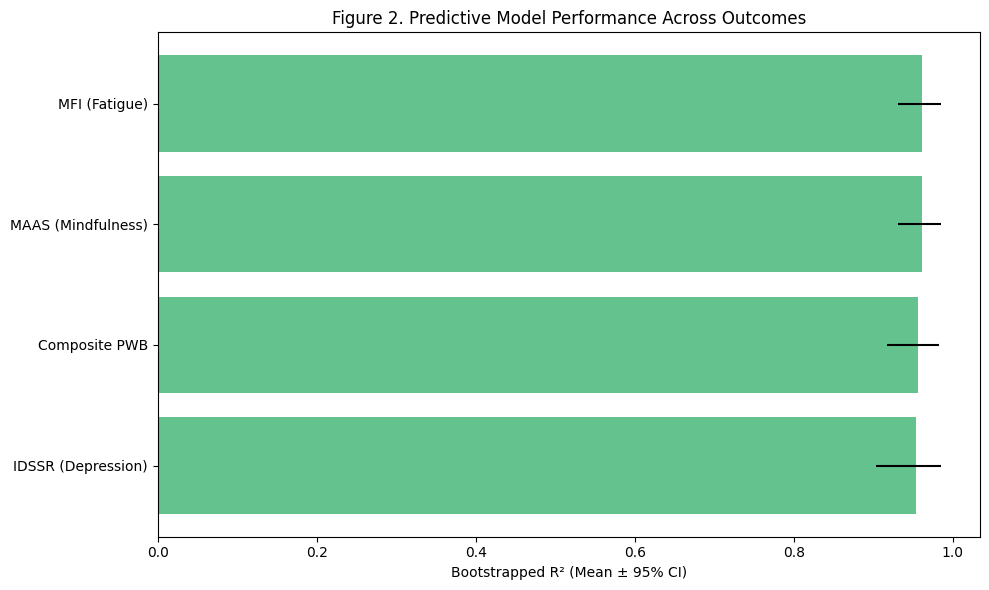

In [ ]:
# Create the barplot for bootstrapped R² with 95% CI
fig, ax = plt.subplots(figsize=(10, 6))

# Sorted order by mean R² for cleaner layout
sorted_df = r2_boot_df.sort_values(by="Mean R²", ascending=False)

# Plot with error bars
ax.barh(
    sorted_df["Outcome"],
    sorted_df["Mean R²"],
    xerr=[
        sorted_df["Mean R²"] - sorted_df["Lower 95% CI"],
        sorted_df["Upper 95% CI"] - sorted_df["Mean R²"]
    ],
    color='mediumseagreen',
    alpha=0.8
)

ax.set_xlabel("Bootstrapped R² (Mean ± 95% CI)")
ax.set_title("Figure 2. Predictive Model Performance Across Outcomes")
ax.invert_yaxis()
plt.tight_layout()
plt.show()


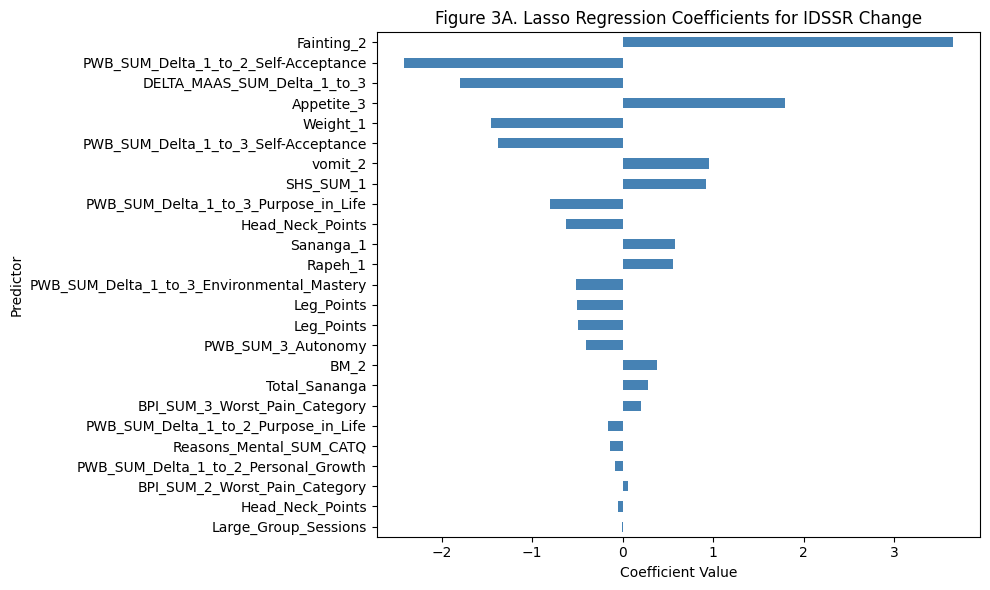

In [ ]:
# Figure 3 Panel A: Lasso nonzero coefficients for IDSSR
# These were originally stored under lasso_nonzero_maas — but now we re-run for IDSSR

# Re-run Lasso for IDSSR with correct leakage cleanup
X_idssr_scaled = scaler.fit_transform(X_idssr_reg)
lasso_idssr = LassoCV(cv=5, random_state=42).fit(X_idssr_scaled, y_idssr)

lasso_coef_idssr = pd.Series(lasso_idssr.coef_, index=X_idssr_reg.columns)
lasso_nonzero_idssr = lasso_coef_idssr[lasso_coef_idssr != 0].sort_values(key=abs, ascending=False)

# Plot Lasso nonzero coefficients
fig, ax = plt.subplots(figsize=(10, 6))
lasso_nonzero_idssr.plot(kind='barh', ax=ax, color='steelblue')
ax.set_title("Figure 3A. Lasso Regression Coefficients for IDSSR Change")
ax.set_xlabel("Coefficient Value")
ax.set_ylabel("Predictor")
ax.invert_yaxis()
plt.tight_layout()
plt.show()


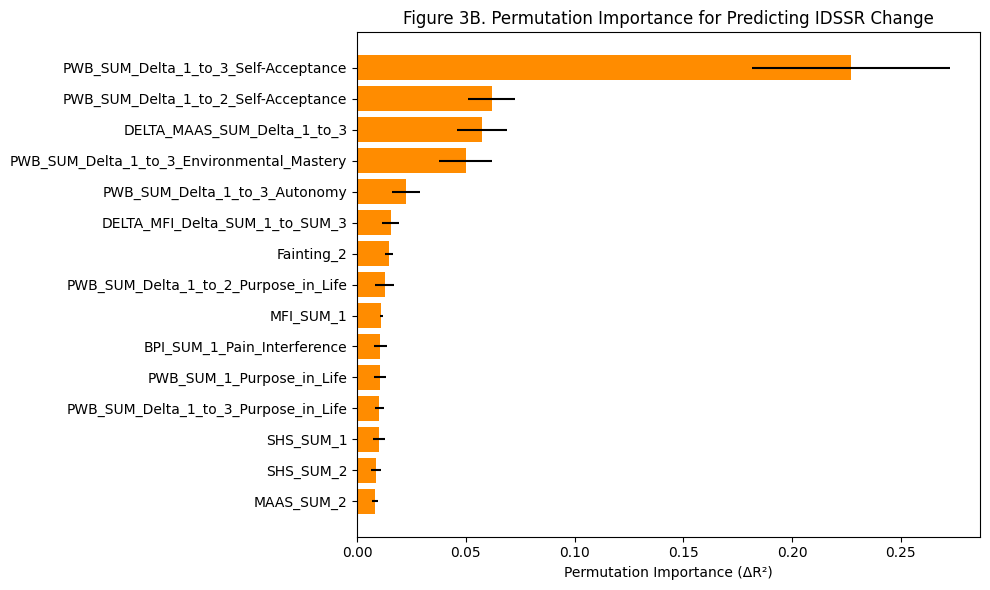

In [ ]:
# Re-run permutation importance for IDSSR model if needed
perm_idssr_result = permutation_importance(
    rf_idssr, X_idssr_reg, y_idssr,
    n_repeats=10,
    random_state=42,
    scoring='r2'
)

# Format results
perm_idssr_df = pd.DataFrame({
    'Feature': X_idssr_reg.columns,
    'Importance': perm_idssr_result.importances_mean,
    'Std': perm_idssr_result.importances_std
}).sort_values(by='Importance', ascending=False)

# Select top 15 for visualization
top_perm_idssr = perm_idssr_df.head(15)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_perm_idssr['Feature'], top_perm_idssr['Importance'], xerr=top_perm_idssr['Std'], color='darkorange')
plt.xlabel('Permutation Importance (ΔR²)')
plt.title('Figure 3B. Permutation Importance for Predicting IDSSR Change')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


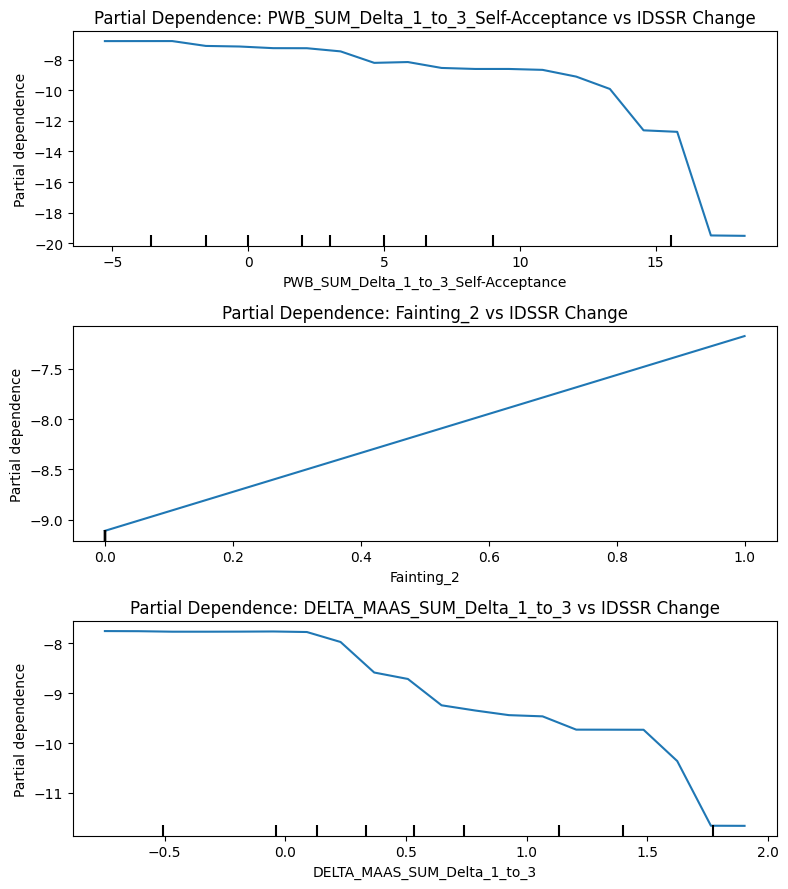

In [ ]:
# Ensure no duplicate columns for PDP
X_idssr_reg = X_idssr_reg.loc[:, ~X_idssr_reg.columns.duplicated()]

# Select top features for PDP
pdp_features_idssr = [
    'PWB_SUM_Delta_1_to_3_Self-Acceptance',
    'Fainting_2',
    'DELTA_MAAS_SUM_Delta_1_to_3'
]

# Plot PDPs
fig, ax = plt.subplots(len(pdp_features_idssr), 1, figsize=(8, 3 * len(pdp_features_idssr)))

for i, feature in enumerate(pdp_features_idssr):
    display = PartialDependenceDisplay.from_estimator(
        rf_idssr,
        X_idssr_reg,
        [feature],
        ax=ax[i],
        kind='average',
        grid_resolution=20
    )
    ax[i].set_title(f'Partial Dependence: {feature} vs IDSSR Change')

plt.tight_layout()
plt.show()


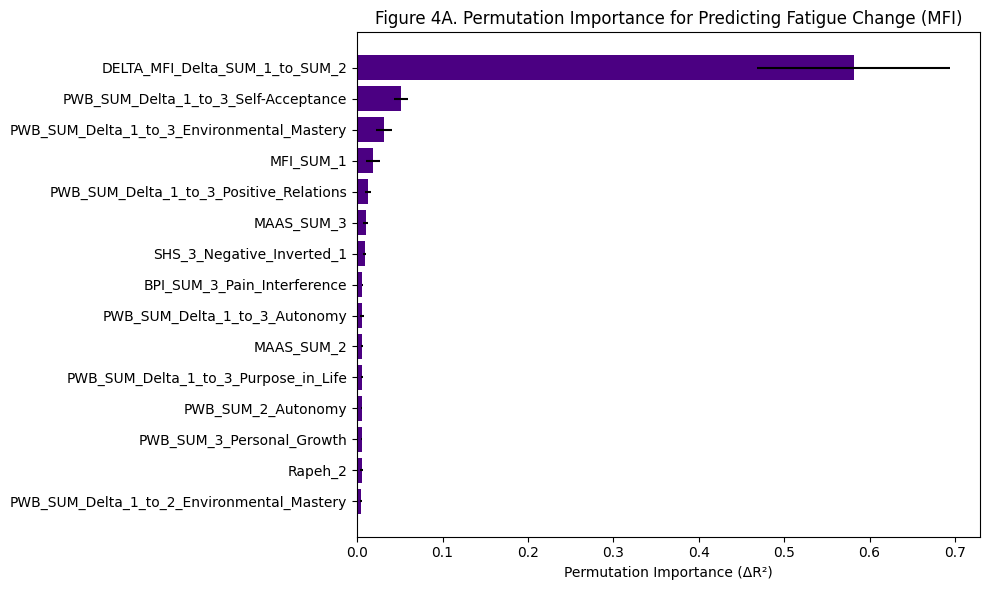

In [ ]:
# Re-run permutation importance for MFI regression model
perm_mfi_reg_result = permutation_importance(
    rf_mfi_reg, X_mfi_regression, y_mfi_regression,
    n_repeats=10,
    random_state=42,
    scoring='r2'
)

# Format results
perm_mfi_reg_df = pd.DataFrame({
    'Feature': X_mfi_regression.columns,
    'Importance': perm_mfi_reg_result.importances_mean,
    'Std': perm_mfi_reg_result.importances_std
}).sort_values(by='Importance', ascending=False)

# Plot top 15 predictors
top_perm_mfi_reg = perm_mfi_reg_df.head(15)
plt.figure(figsize=(10, 6))
plt.barh(top_perm_mfi_reg['Feature'], top_perm_mfi_reg['Importance'], xerr=top_perm_mfi_reg['Std'], color='indigo')
plt.xlabel('Permutation Importance (ΔR²)')
plt.title('Figure 4A. Permutation Importance for Predicting Fatigue Change (MFI)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


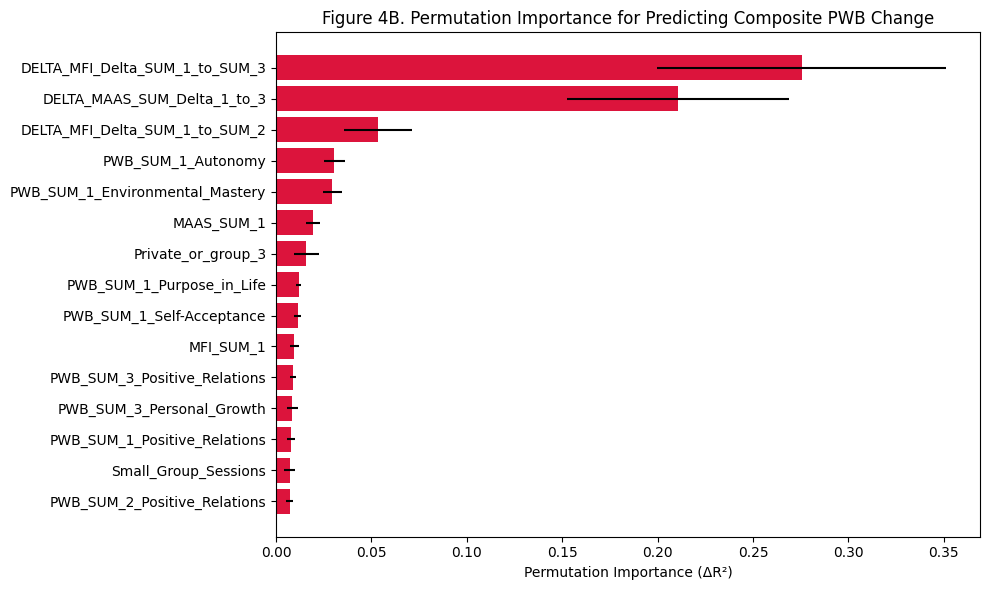

In [ ]:
# Refit the model using the updated DataFrame
rf_pwb_reg = RandomForestRegressor(n_estimators=500, random_state=42)
rf_pwb_reg.fit(X_pwb_regression, y_pwb_regression)

# Re-run permutation importance for Composite PWB regression model
perm_pwb_reg_result = permutation_importance(
    rf_pwb_reg, X_pwb_regression, y_pwb_regression,
    n_repeats=10,
    random_state=42,
    scoring='r2'
)

# Format results
perm_pwb_reg_df = pd.DataFrame({
    'Feature': X_pwb_regression.columns,
    'Importance': perm_pwb_reg_result.importances_mean,
    'Std': perm_pwb_reg_result.importances_std
}).sort_values(by='Importance', ascending=False)

# Plot top 15 predictors
top_perm_pwb_reg = perm_pwb_reg_df.head(15)
plt.figure(figsize=(10, 6))
plt.barh(top_perm_pwb_reg['Feature'], top_perm_pwb_reg['Importance'], xerr=top_perm_pwb_reg['Std'], color='crimson')
plt.xlabel('Permutation Importance (ΔR²)')
plt.title('Figure 4B. Permutation Importance for Predicting Composite PWB Change')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


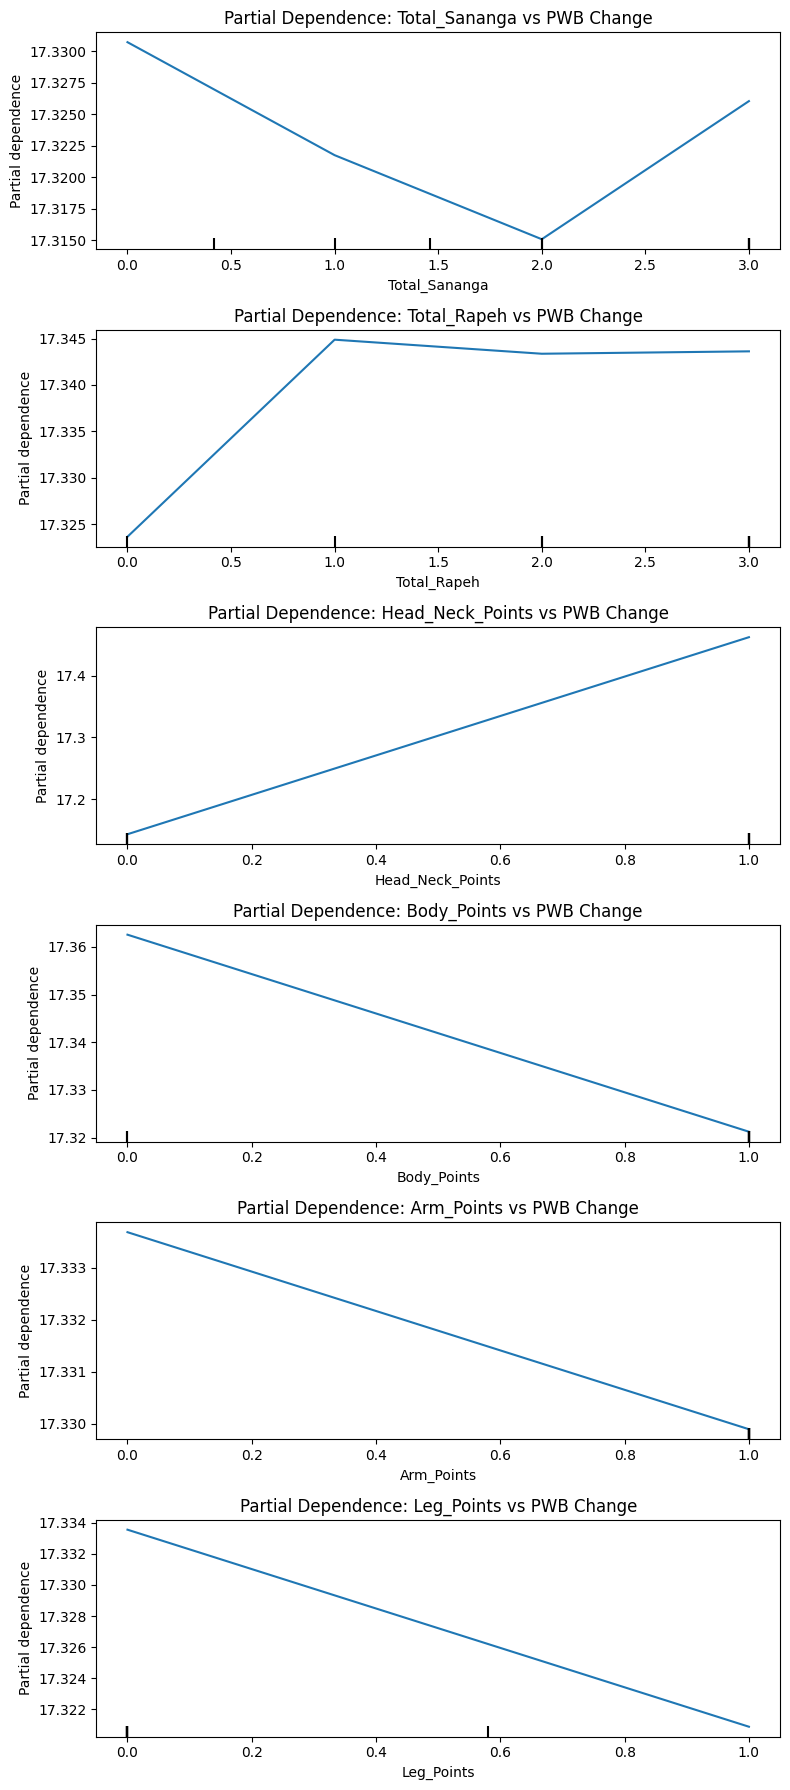

In [ ]:
# Ensure no duplicate columns in PWB regression feature set
X_pwb_regression = X_pwb_regression.loc[:, ~X_pwb_regression.columns.duplicated()]

# Select ritual and placement variables for PDP
pdp_features_pwb = [
    'Total_Sananga',
    'Total_Rapeh',
    'Head_Neck_Points',
    'Body_Points',
    'Arm_Points',
    'Leg_Points'
]

# Plot PDPs
fig, ax = plt.subplots(len(pdp_features_pwb), 1, figsize=(8, 3 * len(pdp_features_pwb)))

for i, feature in enumerate(pdp_features_pwb):
    display = PartialDependenceDisplay.from_estimator(
        rf_pwb_reg,
        X_pwb_regression,
        [feature],
        ax=ax[i],
        kind='average',
        grid_resolution=20
    )
    ax[i].set_title(f'Partial Dependence: {feature} vs PWB Change')

plt.tight_layout()
plt.show()


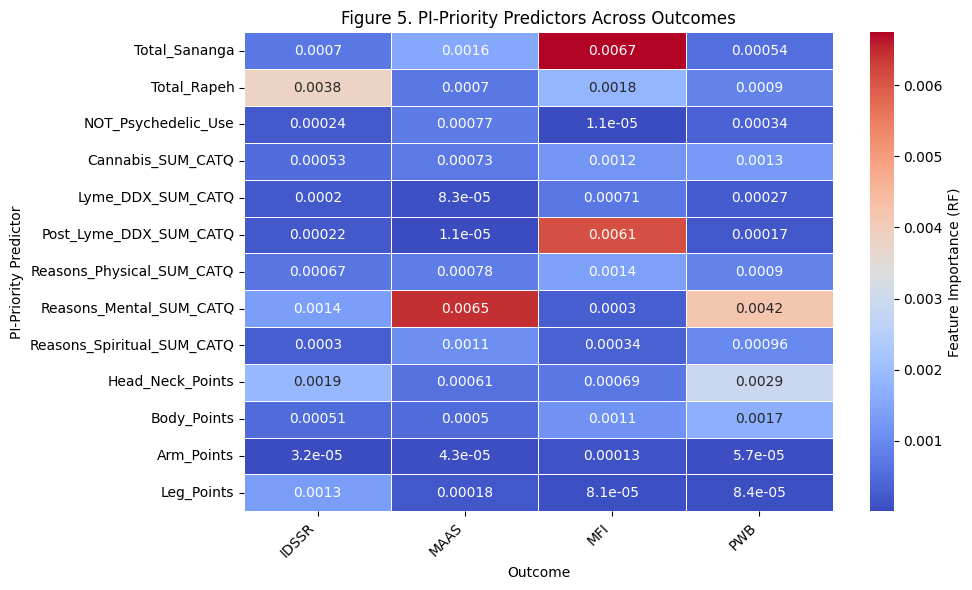

In [ ]:
# Pull feature names from trained RF models directly
summary_sources = {
    'IDSSR': (rf_idssr.feature_importances_, rf_idssr.feature_names_in_),
    'MAAS': (rf_maas_fixed.feature_importances_, rf_maas_fixed.feature_names_in_),
    'MFI': (rf_mfi_reg.feature_importances_, rf_mfi_reg.feature_names_in_),
    'PWB': (rf_pwb_reg.feature_importances_, rf_pwb_reg.feature_names_in_)
}

# Rebuild the table using model-internal feature names
# Build summary from unique feature names
summary_table_5 = pd.DataFrame(index=pi_predictors)

for label, (importances, feature_names) in summary_sources.items():
    # Deduplicate feature names by keeping the max importance
    importance_series = pd.Series(importances, index=feature_names)
    importance_dedup = importance_series.groupby(importance_series.index).max()
    summary_table_5[label] = importance_dedup.reindex(pi_predictors).fillna(0)

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(
    summary_table_5,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    cbar_kws={'label': 'Feature Importance (RF)'}
)
plt.title('Figure 5. PI-Priority Predictors Across Outcomes')
plt.xlabel('Outcome')
plt.ylabel('PI-Priority Predictor')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


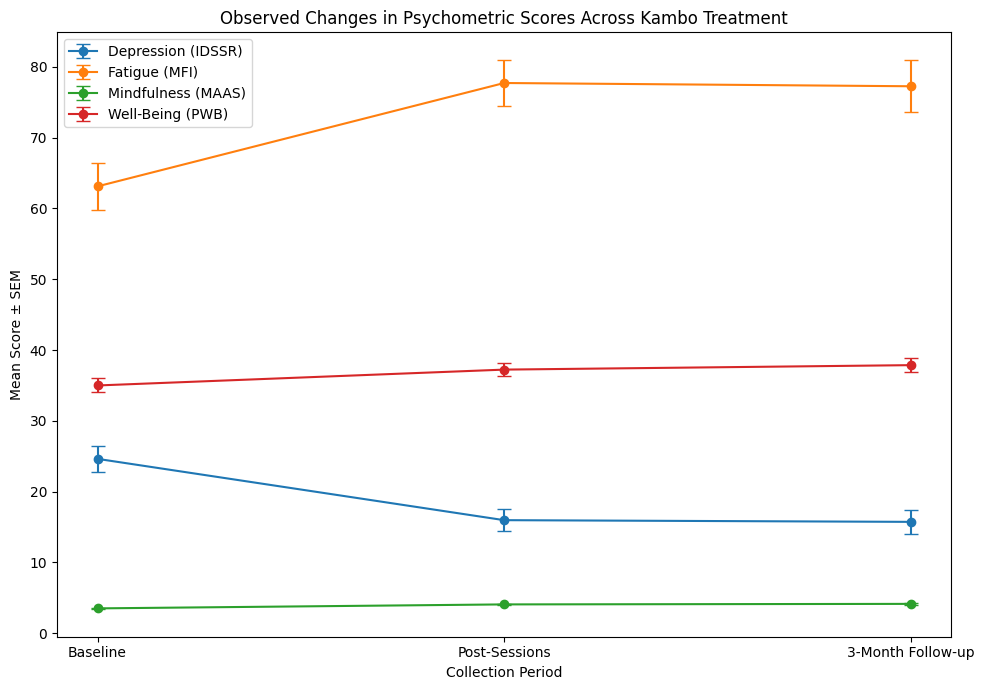

In [ ]:
import matplotlib.pyplot as plt

# Assuming your dataset contains these columns for timepoints
# IDSSR_1, IDSSR_2, IDSSR_3, MFI_SUM_1, MFI_SUM_2, MFI_SUM_3, MAAS_SUM_1, MAAS_SUM_2, MAAS_SUM_3, etc.
# If column names differ, just let me know and I’ll adapt!

# Build a dictionary of scales and their timepoint columns
scale_columns = {
    'Depression (IDSSR)': ['IDSSR_1', 'IDSSR_2', 'IDSSR_3'],
    'Fatigue (MFI)': ['MFI_SUM_1', 'MFI_SUM_2', 'MFI_SUM_3'],
    'Mindfulness (MAAS)': ['MAAS_SUM_1', 'MAAS_SUM_2', 'MAAS_SUM_3'],
    'Well-Being (PWB)': [
        'PWB_SUM_1_Autonomy', 'PWB_SUM_1_Environmental_Mastery', 'PWB_SUM_1_Personal_Growth',
        'PWB_SUM_1_Positive_Relations', 'PWB_SUM_1_Purpose_in_Life', 'PWB_SUM_1_Self-Acceptance',
        'PWB_SUM_2_Autonomy', 'PWB_SUM_2_Environmental_Mastery', 'PWB_SUM_2_Personal_Growth',
        'PWB_SUM_2_Positive_Relations', 'PWB_SUM_2_Purpose_in_Life', 'PWB_SUM_2_Self-Acceptance',
        'PWB_SUM_3_Autonomy', 'PWB_SUM_3_Environmental_Mastery', 'PWB_SUM_3_Personal_Growth',
        'PWB_SUM_3_Positive_Relations', 'PWB_SUM_3_Purpose_in_Life', 'PWB_SUM_3_Self-Acceptance'
    ]
}

# Calculate means and SEMs
mean_scores = {}
sem_scores = {}

for scale, cols in scale_columns.items():
    if 'PWB' in scale:
        # Special case: Average across 6 subscales at each timepoint
        baseline = df[['PWB_SUM_1_Autonomy', 'PWB_SUM_1_Environmental_Mastery', 'PWB_SUM_1_Personal_Growth',
                       'PWB_SUM_1_Positive_Relations', 'PWB_SUM_1_Purpose_in_Life', 'PWB_SUM_1_Self-Acceptance']].mean(axis=1)
        mid = df[['PWB_SUM_2_Autonomy', 'PWB_SUM_2_Environmental_Mastery', 'PWB_SUM_2_Personal_Growth',
                  'PWB_SUM_2_Positive_Relations', 'PWB_SUM_2_Purpose_in_Life', 'PWB_SUM_2_Self-Acceptance']].mean(axis=1)
        final = df[['PWB_SUM_3_Autonomy', 'PWB_SUM_3_Environmental_Mastery', 'PWB_SUM_3_Personal_Growth',
                    'PWB_SUM_3_Positive_Relations', 'PWB_SUM_3_Purpose_in_Life', 'PWB_SUM_3_Self-Acceptance']].mean(axis=1)
        stacked = [baseline, mid, final]
    else:
        stacked = [df[cols[0]], df[cols[1]], df[cols[2]]]

    means = [s.mean() for s in stacked]
    sems = [s.sem() for s in stacked]

    mean_scores[scale] = means
    sem_scores[scale] = sems

# Plot
fig, ax = plt.subplots(figsize=(10, 7))

timepoints = ['Baseline', 'Post-Sessions', '3-Month Follow-up']

for scale in mean_scores:
    ax.errorbar(timepoints, mean_scores[scale], yerr=sem_scores[scale], label=scale, marker='o', capsize=5)

ax.set_ylabel('Mean Score ± SEM')
ax.set_xlabel('Collection Period')
ax.set_title('Observed Changes in Psychometric Scores Across Kambo Treatment')
ax.legend()
plt.tight_layout()
plt.show()


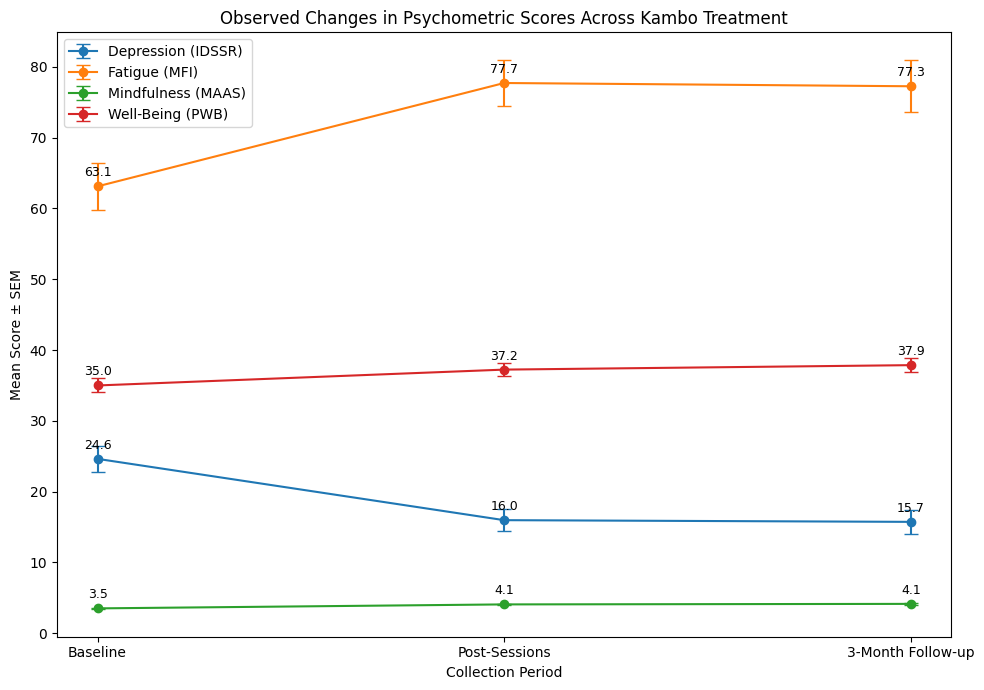

In [ ]:
import matplotlib.pyplot as plt

# Redefine the timepoints
timepoints = ['Baseline', 'Post-Sessions', '3-Month Follow-up']

# Replot with annotations
fig, ax = plt.subplots(figsize=(10, 7))

for scale in mean_scores:
    ax.errorbar(timepoints, mean_scores[scale], yerr=sem_scores[scale], label=scale, marker='o', capsize=5)
    # Annotate each point
    for i, (x, y) in enumerate(zip(timepoints, mean_scores[scale])):
        ax.text(i, y + 1, f"{y:.1f}", ha='center', va='bottom', fontsize=9)

ax.set_ylabel('Mean Score ± SEM')
ax.set_xlabel('Collection Period')
ax.set_title('Observed Changes in Psychometric Scores Across Kambo Treatment')
ax.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Redefine timepoints
timepoints = ['Baseline', 'Post-Sessions', '3-Month Follow-up']

# Create a DataFrame to hold all values
summary_table = []

for scale in mean_scores:
    # Means and SEMs already calculated
    means = mean_scores[scale]
    sems = sem_scores[scale]

    # Now calculate SDs directly from the raw data
    if 'PWB' in scale:
        baseline = df[['PWB_SUM_1_Autonomy', 'PWB_SUM_1_Environmental_Mastery', 'PWB_SUM_1_Personal_Growth',
                       'PWB_SUM_1_Positive_Relations', 'PWB_SUM_1_Purpose_in_Life', 'PWB_SUM_1_Self-Acceptance']].mean(axis=1)
        mid = df[['PWB_SUM_2_Autonomy', 'PWB_SUM_2_Environmental_Mastery', 'PWB_SUM_2_Personal_Growth',
                  'PWB_SUM_2_Positive_Relations', 'PWB_SUM_2_Purpose_in_Life', 'PWB_SUM_2_Self-Acceptance']].mean(axis=1)
        final = df[['PWB_SUM_3_Autonomy', 'PWB_SUM_3_Environmental_Mastery', 'PWB_SUM_3_Personal_Growth',
                    'PWB_SUM_3_Positive_Relations', 'PWB_SUM_3_Purpose_in_Life', 'PWB_SUM_3_Self-Acceptance']].mean(axis=1)
        raw_scores = [baseline, mid, final]
    else:
        raw_scores = [df[scale_columns[scale][0]], df[scale_columns[scale][1]], df[scale_columns[scale][2]]]

    sds = [s.std() for s in raw_scores]

    # Calculate mean and SD changes
    mean_change_1_to_2 = means[1] - means[0]
    mean_change_1_to_3 = means[2] - means[0]
    sd_change_1_to_2 = (raw_scores[1] - raw_scores[0]).std()
    sd_change_1_to_3 = (raw_scores[2] - raw_scores[0]).std()

    for i, timepoint in enumerate(timepoints):
        summary_table.append({
            'Scale': scale,
            'Timepoint': timepoint,
            'Mean': means[i],
            'SEM': sems[i],
            'SD': sds[i]
        })

    # Add change rows
    summary_table.append({
        'Scale': scale,
        'Timepoint': 'Change (Post-Sessions - Baseline)',
        'Mean': mean_change_1_to_2,
        'SEM': None,
        'SD': sd_change_1_to_2
    })
    summary_table.append({
        'Scale': scale,
        'Timepoint': 'Change (3-Month - Baseline)',
        'Mean': mean_change_1_to_3,
        'SEM': None,
        'SD': sd_change_1_to_3
    })

# Convert to DataFrame
summary_df = pd.DataFrame(summary_table)

summary_df

Scale                          Timepoint       Mean  \
0   Depression (IDSSR)                           Baseline  24.620000   
1   Depression (IDSSR)                      Post-Sessions  15.960000   
2   Depression (IDSSR)                  3-Month Follow-up  15.720000   
3   Depression (IDSSR)  Change (Post-Sessions - Baseline)  -8.660000   
4   Depression (IDSSR)        Change (3-Month - Baseline)  -8.900000   
5        Fatigue (MFI)                           Baseline  63.120000   
6        Fatigue (MFI)                      Post-Sessions  77.720000   
7        Fatigue (MFI)                  3-Month Follow-up  77.260000   
8        Fatigue (MFI)  Change (Post-Sessions - Baseline)  14.600000   
9        Fatigue (MFI)        Change (3-Month - Baseline)  14.140000   
10  Mindfulness (MAAS)                           Baseline   3.497333   
11  Mindfulness (MAAS)                      Post-Sessions   4.059429   
12  Mindfulness (MAAS)                  3-Month Follow-up   4.133857   
13  Mindfulness (MAAS)  Change (Post-Sessions - Baseline)   0.562095   
14  Mindfulness (MAAS)        Change (3-Month - Baseline)   0.636524   
15    Well-Being (PWB)                           Baseline  34.990000   
16    Well-Being (PWB)                      Post-Sessions  37.230000   
17    Well-Being (PWB)                  3-Month Follow-up  37.860000   
18    Well-Being (PWB)  Change (Post-Sessions - Baseline)   2.240000   
19    Well-Being (PWB)        Change (3-Month - Baseline)   2.870000   

         SEM         SD  
0   1.808571  12.788531  
1   1.511307  10.686555  
2   1.658630  11.728284  
3        NaN  12.633952  
4        NaN  11.777270  
5   3.302274  23.350602  
6   3.277386  23.174617  
7   3.644936  25.773590  
8        NaN  16.847455  
9        NaN  21.749042  
10  0.122472   0.866008  
11  0.115437   0.816260  
12  0.121507   0.859187  
13       NaN   0.921303  
14       NaN   0.878408  
15  0.993453   7.024771  
16  0.951868   6.730720  
17  0.982262   6.945639  
18       NaN   3.804932  
19       NaN   4.660989

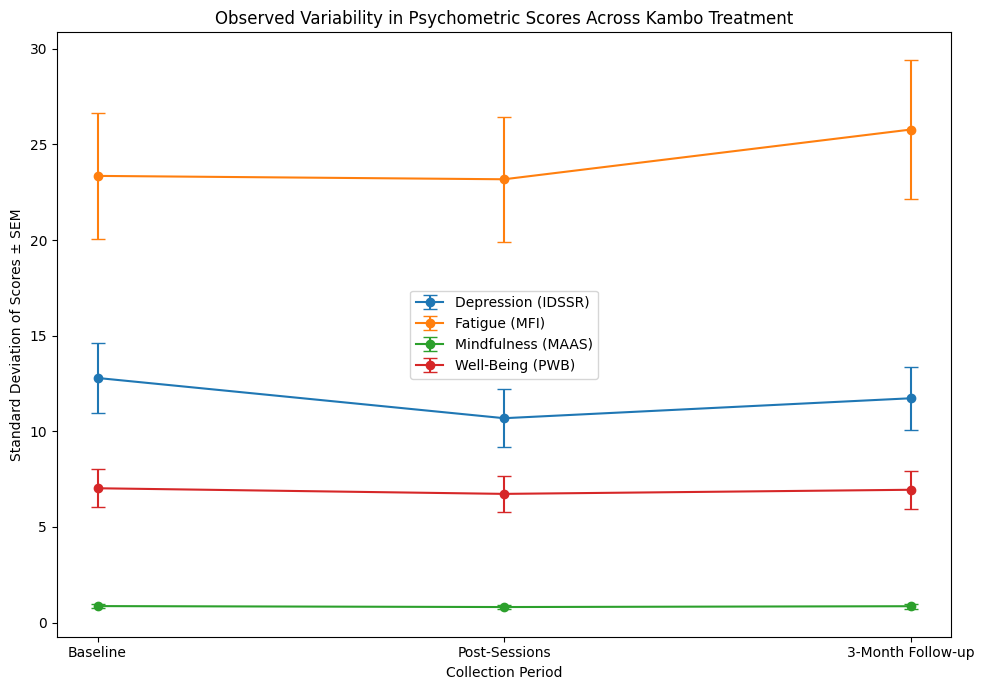

In [ ]:
import matplotlib.pyplot as plt

# Redefine timepoints
timepoints = ['Baseline', 'Post-Sessions', '3-Month Follow-up']

# Build SDs and SEMs at each point
sd_scores = {}
sem_scores = {}

for scale, cols in scale_columns.items():
    if 'PWB' in scale:
        baseline = df[['PWB_SUM_1_Autonomy', 'PWB_SUM_1_Environmental_Mastery', 'PWB_SUM_1_Personal_Growth',
                       'PWB_SUM_1_Positive_Relations', 'PWB_SUM_1_Purpose_in_Life', 'PWB_SUM_1_Self-Acceptance']].mean(axis=1)
        mid = df[['PWB_SUM_2_Autonomy', 'PWB_SUM_2_Environmental_Mastery', 'PWB_SUM_2_Personal_Growth',
                  'PWB_SUM_2_Positive_Relations', 'PWB_SUM_2_Purpose_in_Life', 'PWB_SUM_2_Self-Acceptance']].mean(axis=1)
        final = df[['PWB_SUM_3_Autonomy', 'PWB_SUM_3_Environmental_Mastery', 'PWB_SUM_3_Personal_Growth',
                    'PWB_SUM_3_Positive_Relations', 'PWB_SUM_3_Purpose_in_Life', 'PWB_SUM_3_Self-Acceptance']].mean(axis=1)
        stacked = [baseline, mid, final]
    else:
        stacked = [df[cols[0]], df[cols[1]], df[cols[2]]]

    sds = [s.std() for s in stacked]
    sems = [s.sem() for s in stacked]  # SEM of the SDs (just for error bars, optional)

    sd_scores[scale] = sds
    sem_scores[scale] = sems

# Plot
fig, ax = plt.subplots(figsize=(10, 7))

for scale in sd_scores:
    ax.errorbar(timepoints, sd_scores[scale], yerr=sem_scores[scale], label=scale, marker='o', capsize=5)

ax.set_ylabel('Standard Deviation of Scores ± SEM')
ax.set_xlabel('Collection Period')
ax.set_title('Observed Variability in Psychometric Scores Across Kambo Treatment')
ax.legend()
plt.tight_layout()
plt.show()


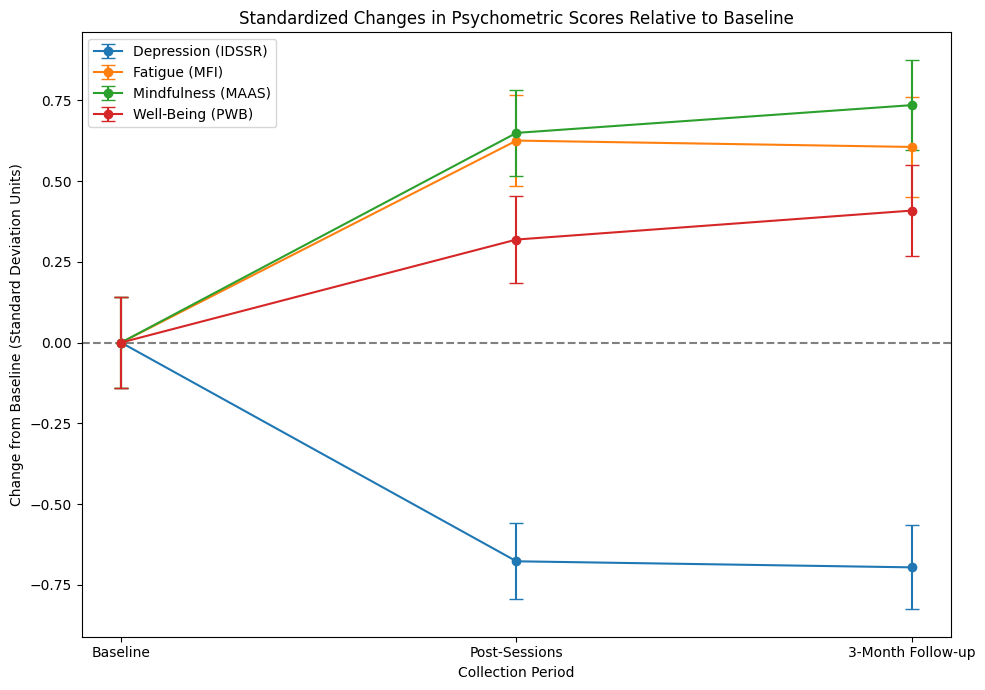

In [ ]:
import matplotlib.pyplot as plt

# Redefine timepoints
timepoints = ['Baseline', 'Post-Sessions', '3-Month Follow-up']

standardized_changes = {}
standardized_errors = {}

for scale, cols in scale_columns.items():
    if 'PWB' in scale:
        baseline = df[['PWB_SUM_1_Autonomy', 'PWB_SUM_1_Environmental_Mastery', 'PWB_SUM_1_Personal_Growth',
                       'PWB_SUM_1_Positive_Relations', 'PWB_SUM_1_Purpose_in_Life', 'PWB_SUM_1_Self-Acceptance']].mean(axis=1)
        mid = df[['PWB_SUM_2_Autonomy', 'PWB_SUM_2_Environmental_Mastery', 'PWB_SUM_2_Personal_Growth',
                  'PWB_SUM_2_Positive_Relations', 'PWB_SUM_2_Purpose_in_Life', 'PWB_SUM_2_Self-Acceptance']].mean(axis=1)
        final = df[['PWB_SUM_3_Autonomy', 'PWB_SUM_3_Environmental_Mastery', 'PWB_SUM_3_Personal_Growth',
                    'PWB_SUM_3_Positive_Relations', 'PWB_SUM_3_Purpose_in_Life', 'PWB_SUM_3_Self-Acceptance']].mean(axis=1)
        stacked = [baseline, mid, final]
    else:
        stacked = [df[cols[0]], df[cols[1]], df[cols[2]]]

    baseline_mean = stacked[0].mean()
    baseline_std = stacked[0].std()

    # Standardize means
    standardized_means = [(s.mean() - baseline_mean) / baseline_std for s in stacked]

    # Standardize SEMs
    standardized_sems = [(s.sem()) / baseline_std for s in stacked]

    standardized_changes[scale] = standardized_means
    standardized_errors[scale] = standardized_sems

# Plot
fig, ax = plt.subplots(figsize=(10, 7))

for scale in standardized_changes:
    ax.errorbar(timepoints, standardized_changes[scale], yerr=standardized_errors[scale], label=scale, marker='o', capsize=5)

ax.axhline(0, color='gray', linestyle='--')
ax.set_ylabel('Change from Baseline (Standard Deviation Units)')
ax.set_xlabel('Collection Period')
ax.set_title('Standardized Changes in Psychometric Scores Relative to Baseline')
ax.legend()
plt.tight_layout()
plt.show()
